<a href="https://colab.research.google.com/github/XuRui314/MathematicalModeling/blob/main/%E6%95%B0%E6%A8%A1%E7%AC%AC%E5%9B%9B%E6%AC%A1%E7%BB%83%E4%B9%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 题目描述

C4 烯烃广泛应用于化工产品及医药的生产，乙醇是生产制备 C4 烯烃的原料。
在制备过程中，催化剂组合（即：Co 负载量、Co/SiO2 和 HAP 装料比、乙醇浓度
的组合）与温度对 C4 烯烃的选择性和 C4 烯烃收率将产生影响（名词解释见附录）。
因此通过对催化剂组合设计，探索乙醇催化偶合制备 C4 烯烃的工艺条件具有非常
重要的意义和价值。
某化工实验室针对不同催化剂在不同温度下做了一系列实验，结果如附件 1 和
附件 2 所示。请通过数学建模完成下列问题：
1. 对附件 1 中每种催化剂组合，分别研究乙醇转化率、C4 烯烃的选择性与温
度的关系，并对附件 2 中 350 度时给定的催化剂组合在一次实验不同时间的测试结
果进行分析。
2. 探讨不同催化剂组合及温度对乙醇转化率以及 C4 烯烃选择性大小的影响。
3.  如何选择催化剂组合与温度，使得在相同实验条件下 C4 烯烃收率尽可能
高。若使温度低于 350 度，又如何选择催化剂组合与温度，使得 C4 烯烃收率尽可
能高。
4. 如果允许再增加 5 次实验，应如何设计，并给出详细理由。

## 数据处理

In [1]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/2021B")
!ls

 Advertising.csv   result1.svg	  附件1.xlsx
 data10_4.txt	  'SimHei .ttf'   附件2.xlsx


In [3]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn

--2022-08-26 07:10:38--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  30.2MB/s    in 0.3s    

2022-08-26 07:10:39 (30.2 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fsKERl26TNTFIY25PhReoCujxwJvfyHn
To: /content/drive/MyDrive/dataset/MathModel/2021B/SimHei .ttf
100% 10.1M/10.1M [00:00<00:00, 31.8

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
plt.style.use('seaborn')  

fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')

In [5]:
data = pd.read_excel("附件1.xlsx",usecols="C:J")
data

,温度,乙醇转化率(%),乙烯选择性（%）,C4烯烃选择性(%),乙醛选择性(%),碳数为4-12脂肪醇 选择性(%),甲基苯甲醛和甲基苯甲醇选择性(%),其他生成物的选择性(%)
0,250,2.067169,1.17,34.05,2.41,52.59,0.00,9.78
1,275,5.851721,1.63,37.43,1.42,53.21,0.00,6.31
2,300,14.968891,3.02,46.94,4.71,35.16,1.00,9.17
3,325,19.681359,7.97,49.70,14.69,15.16,2.13,10.35
4,350,36.801017,12.46,47.21,18.66,9.22,1.69,10.76
...,...,...,...,...,...,...,...,...
109,275,7.900000,0.15,6.62,3.49,79.79,5.67,4.28
110,300,11.700000,0.20,12.86,6.47,68.02,6.71,5.74
111,325,17.800000,1.42,18.45,7.94,59.12,7.14,5.93
112,350,30.200000,1.53,25.05,10.30,49.36,6.30,7.46


接下来是处理不规范的部分，有两列：
1. 催化剂组合编号：A1-A14，B1-B7
2. 催化剂组合：分为Co/SiO2、HAP、乙醇浓度三种类型

In [6]:
index_id = ['A1']*5+['A2']*5+['A3']*7+['A4']*6+['A5']*6+['A6']*5+['A7']*5+['A8']*5+['A9']*5+['A10']*5+['A11']*5+['A12']*5+['A13']*5+['A14']*5+['B1']*5+['B2']*5+['B3']*6+['B4']*6+['B5']*6+['B6']*6+['B7']*6

In [7]:
data['组合编号']=index_id

In [8]:
CoSiO_mass = [200]*5+[200]*5+[200]*7+[200]*6+[200]*6+[200]*5+[50]*5+[50]*5+[50]*5+[50]*5+[50]*5+[50]*5+[67]*5+[33]*5+[50]*5+[100]*5+[10]*6+[25]*6+[50]*6+[75]*6+[100]*6
CoSiO_density = [1]*5+[2]*5+[1]*7+[0.5]*6+[2]*6+[5]*5+[1]*5+[1]*5+[1]*5+[5]*5+[1]*5+[1]*5+[1]*5+[1]*5+[1]*5+[1]*5+[1]*6+[1]*6+[1]*6+[1]*6+[1]*6
data['CoSiO质量'] = CoSiO_mass
data['CoSiO浓度'] = CoSiO_density

In [9]:
HAP_mass = [200]*5+[200]*5+[200]*7+[200]*6+[200]*6+[200]*5+[50]*5+[50]*5+[50]*5+[50]*5+[90]*5+[50]*5+[67]*5+[33]*5+[50]*5+[100]*5+[10]*6+[25]*6+[50]*6+[75]*6+[100]*6
data['HAP质量'] = HAP_mass

In [10]:
Ethanol_density = [1.68]*5+[1.68]*5+[0.9]*7+[1.68]*6+[0.3]*6+[1.68]*5+[0.3]*5+[0.9]*5+[2.1]*5+[2.1]*5+[1.68]*5+[1.68]*5+[1.68]*5+[1.68]*5+[1.68]*5+[1.68]*5+[1.68]*6+[1.68]*6+[2.1]*6+[1.68]*6+[0.9]*6
data['乙醇浓度'] = Ethanol_density

In [11]:
data

,温度,乙醇转化率(%),乙烯选择性（%）,C4烯烃选择性(%),乙醛选择性(%),碳数为4-12脂肪醇 选择性(%),甲基苯甲醛和甲基苯甲醇选择性(%),其他生成物的选择性(%),组合编号,CoSiO质量,CoSiO浓度,HAP质量,乙醇浓度
0,250,2.067169,1.17,34.05,2.41,52.59,0.00,9.78,A1,200,1.0,200,1.68
1,275,5.851721,1.63,37.43,1.42,53.21,0.00,6.31,A1,200,1.0,200,1.68
2,300,14.968891,3.02,46.94,4.71,35.16,1.00,9.17,A1,200,1.0,200,1.68
3,325,19.681359,7.97,49.70,14.69,15.16,2.13,10.35,A1,200,1.0,200,1.68
4,350,36.801017,12.46,47.21,18.66,9.22,1.69,10.76,A1,200,1.0,200,1.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,275,7.900000,0.15,6.62,3.49,79.79,5.67,4.28,B7,100,1.0,100,0.90
110,300,11.700000,0.20,12.86,6.47,68.02,6.71,5.74,B7,100,1.0,100,0.90
111,325,17.800000,1.42,18.45,7.94,59.12,7.14,5.93,B7,100,1.0,100,0.90
112,350,30.200000,1.53,25.05,10.30,49.36,6.30,7.46,B7,100,1.0,100,0.90


## 问题一

第一个是对附件 1 中每种催化剂组合，分别研究乙醇转化率、C4 烯烃的选择性与温度的关系，第二个是对附件 2 中 350 度时给定的催化剂组合在一次实验不同时间的测试结 果进行分析。

温度和各种催化剂的量可以视为自变量，各种产物的选择性可以视为因变量。

分析关系的方法有很多种，首先还是先看看数据分布：

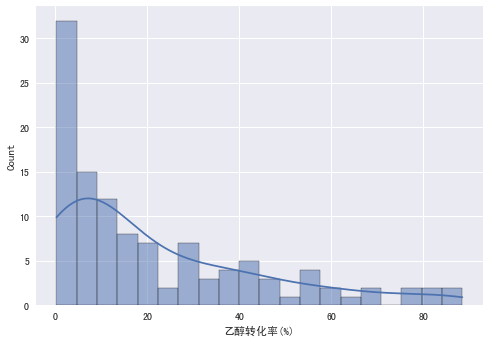

In [12]:
sns.histplot(data['乙醇转化率(%)'] ,bins=20, kde=True)

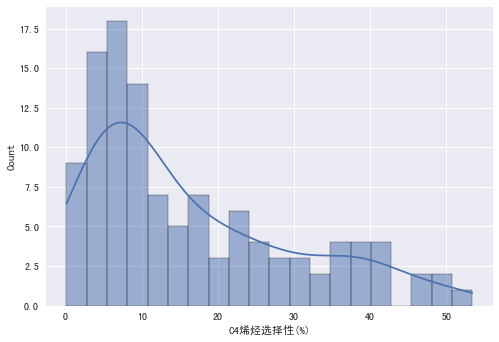

In [13]:
sns.histplot(data['C4烯烃选择性(%)'] ,bins=20, kde=True)

In [14]:
data['温度'].unique()

array([250, 275, 300, 325, 350, 400, 450])

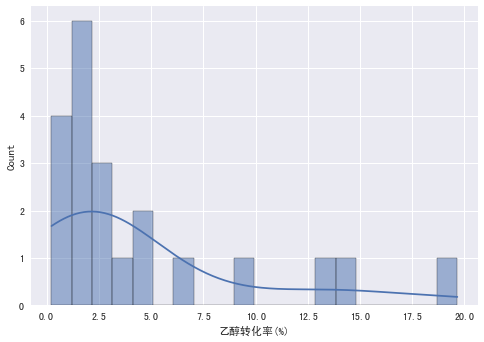

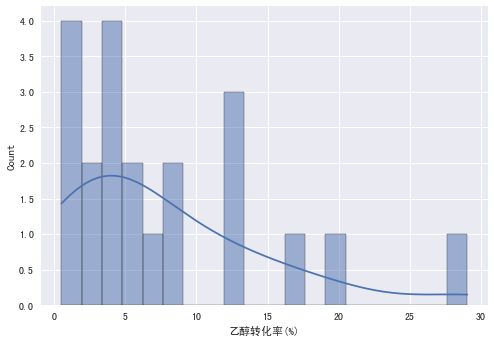

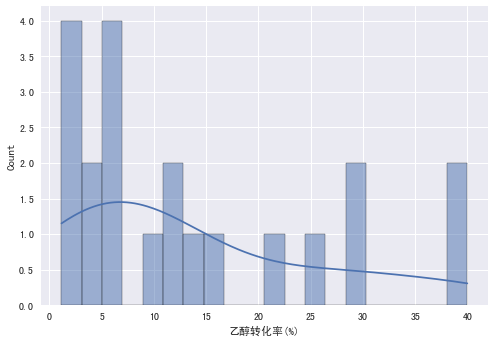

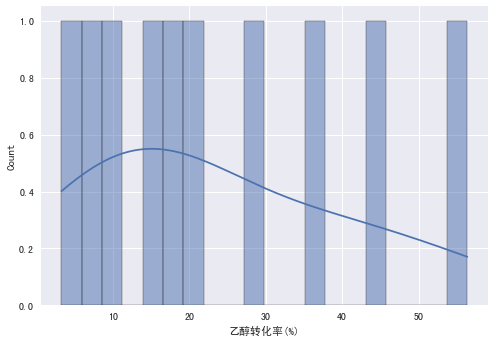

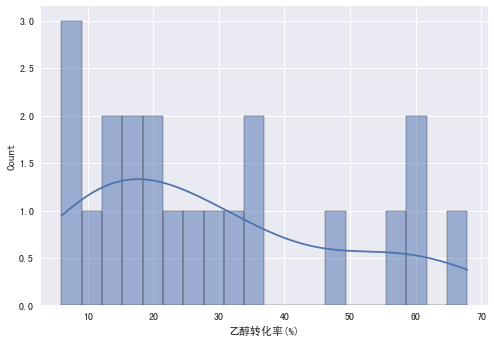

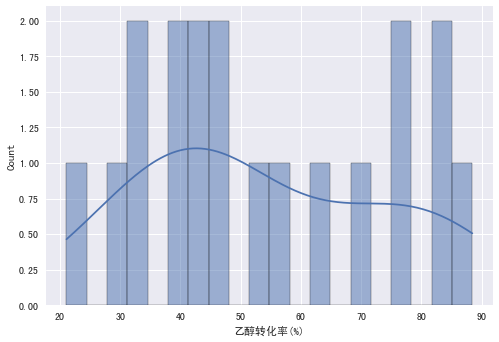

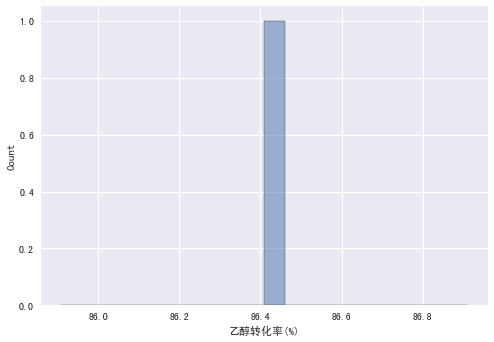

In [15]:
grouped = data.groupby('温度')
for tem in data['温度'].unique():
  sns.histplot(grouped.get_group(tem)['乙醇转化率(%)'] ,bins=20, kde=True)
  plt.show()

先弄个Spearman看看：

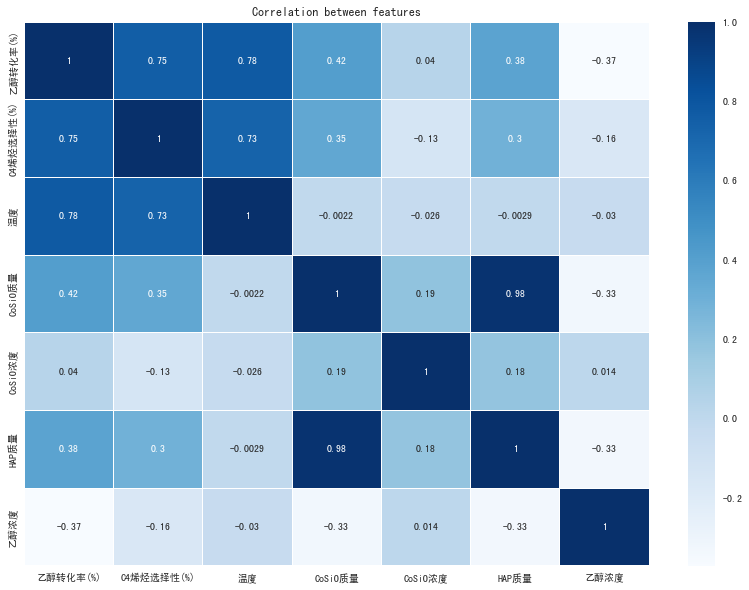

In [16]:
data_spearman = data[['乙醇转化率(%)','C4烯烃选择性(%)','温度','CoSiO质量','CoSiO浓度','HAP质量','乙醇浓度']]
f, ax= plt.subplots(figsize = (14, 10))

corr = data_spearman.corr(method="spearman")
# print(corr)
sns.heatmap(corr,cmap="Blues", linewidths = 0.05, annot=True,ax = ax)

# 设置Axes的标题
ax.set_title('Correlation between features')
plt.show()

然后也可以来看看每组之间的：

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


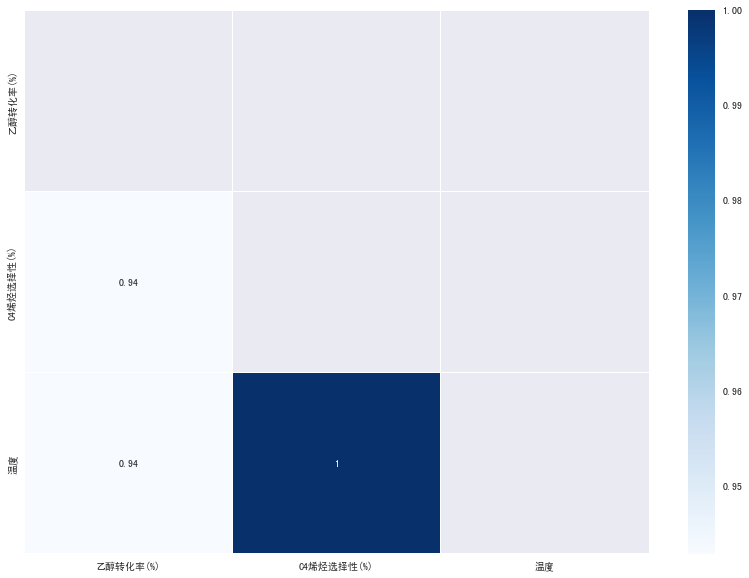

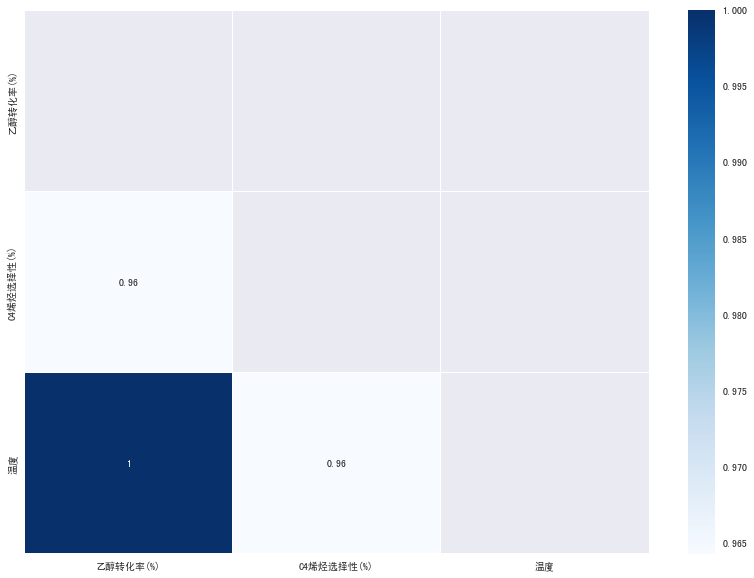

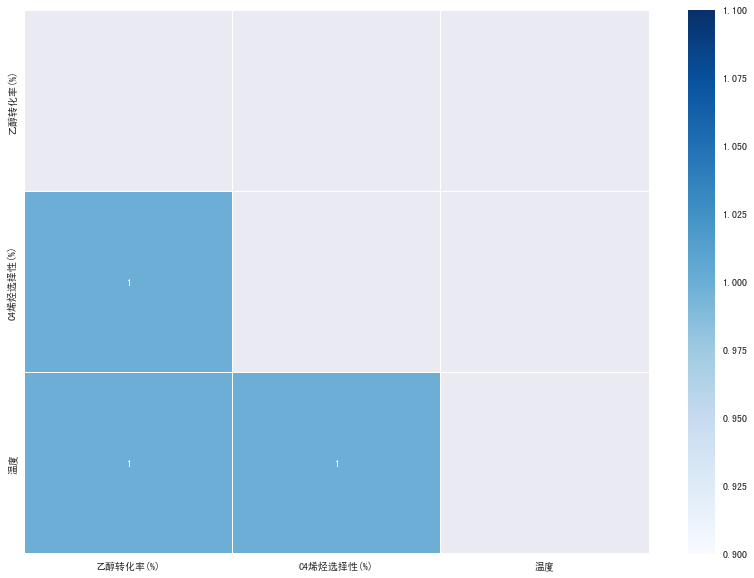

In [17]:
import random
grouped = data.groupby('组合编号')

columns = ['乙醇转化率(%)','C4烯烃选择性(%)','温度']
df_list = [each[1][columns] for each in grouped]
random.shuffle(df_list)
for idx,i in enumerate(df_list):
    f, ax= plt.subplots(figsize = (14, 10))

    mcorr = i.corr(method="spearman")  
    mask = np.zeros_like(mcorr, dtype=np.bool)  
    mask[np.triu_indices_from(mask)] = True  

    sns.heatmap(mcorr, cmap="Blues", mask = mask, linewidths = 0.05, annot=True,ax = ax)
    plt.show()
    # 控制打印的数目
    if idx == 2:
        break

每一组的可视化：

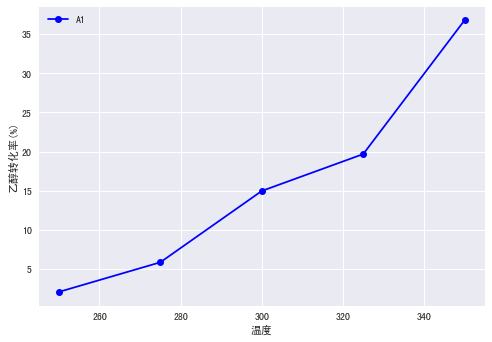

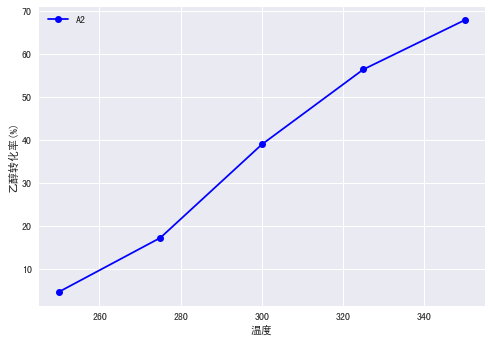

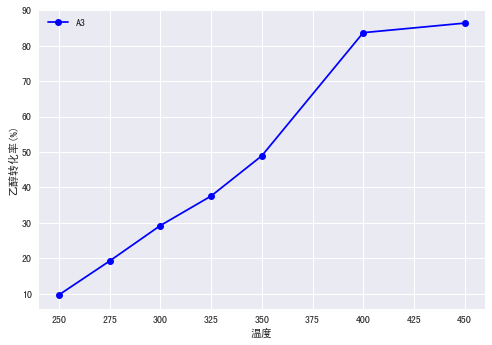

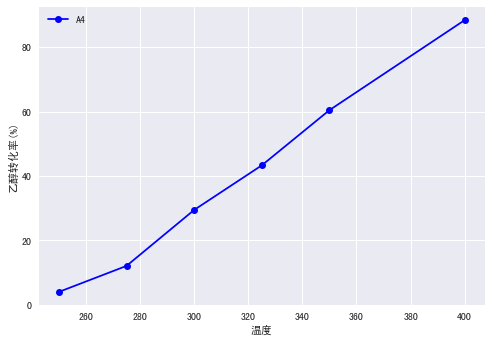

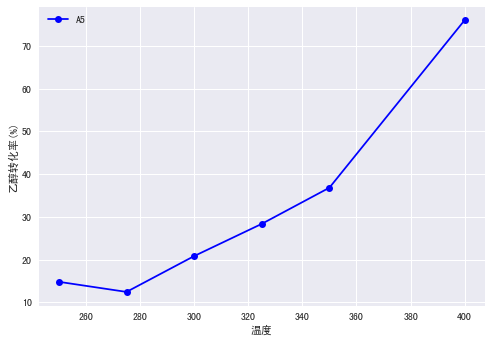

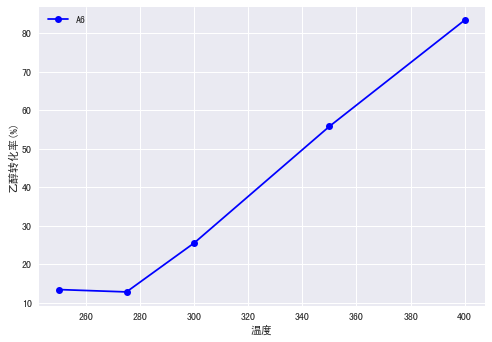

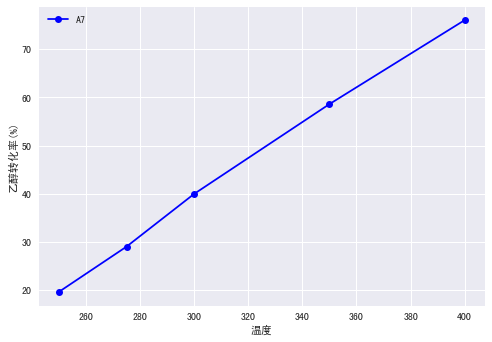

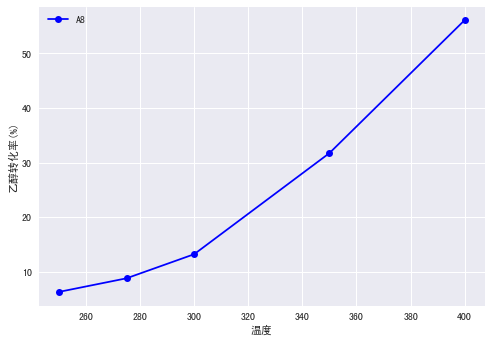

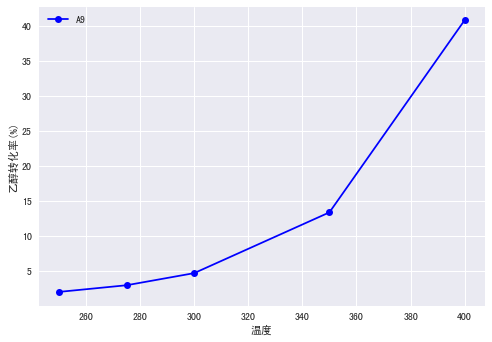

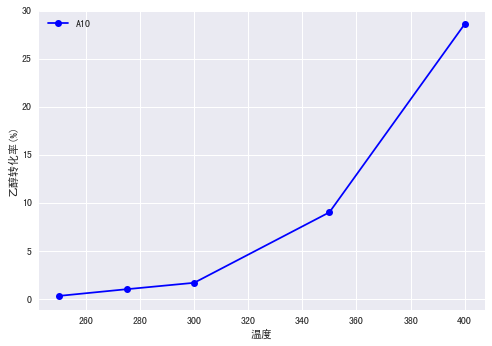

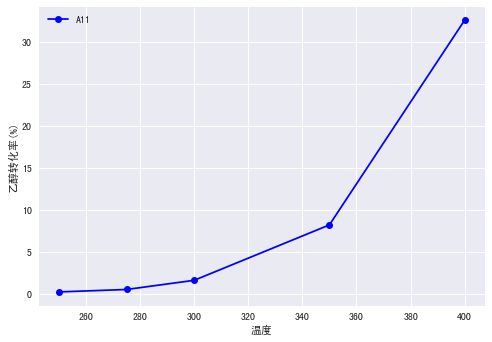

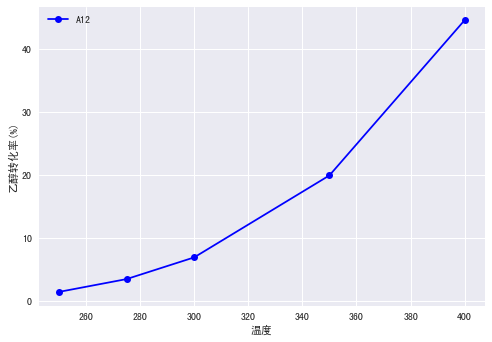

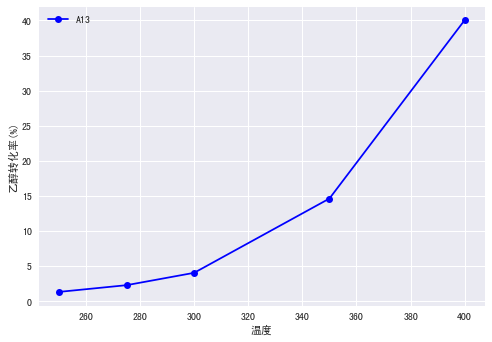

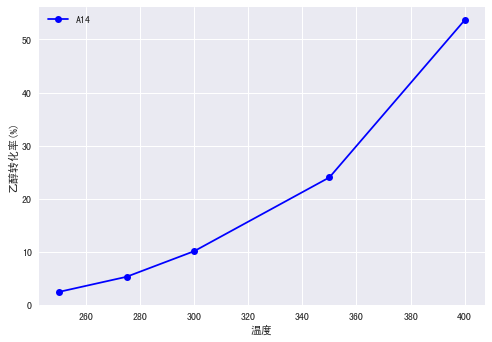

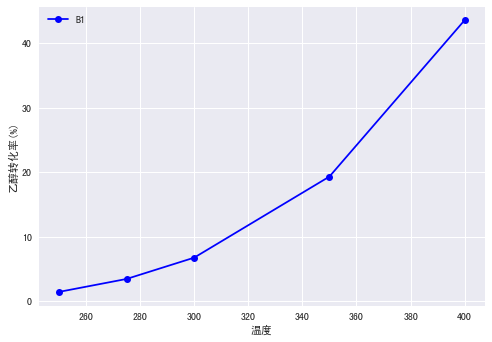

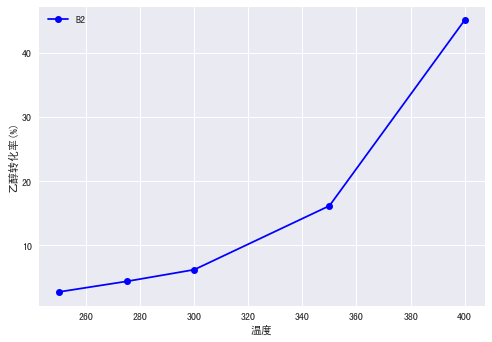

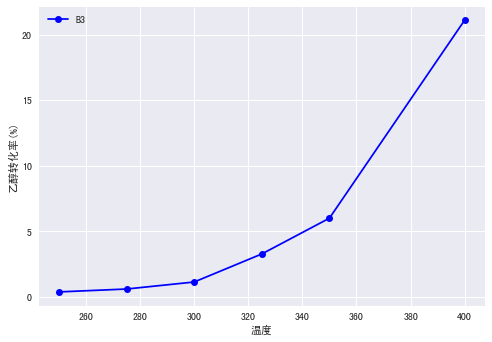

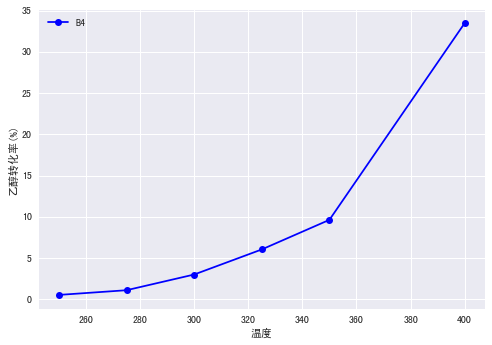

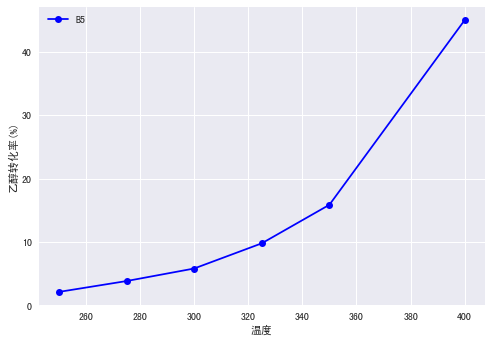

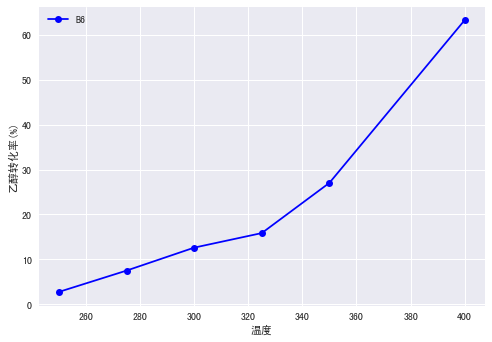

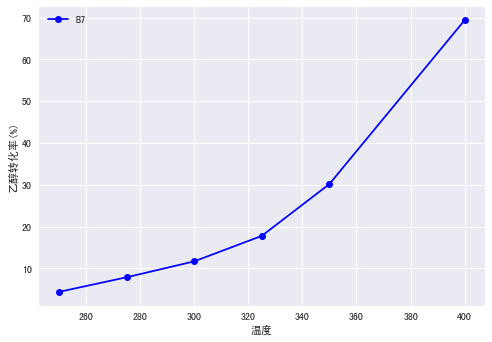

In [18]:
grouped = data.groupby('组合编号')
for item in data['组合编号'].unique():
  y = grouped.get_group(item)['乙醇转化率(%)'].values
  x = grouped.get_group(item)['温度'].values
  plt.xlabel('温度')
  plt.ylabel('乙醇转化率(%)')
  plt.plot(x, y, '-o', label=item,color='b')
  plt.legend()
  plt.show()

确实有种多项式的感觉，接下来进行分析和拟合，不难观察出A1-A7是偏线性的，A8-B7偏曲线，这里采用线性、二次、指数型三种形式的拟合。

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


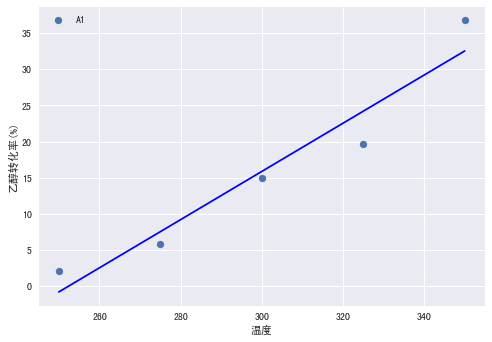

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


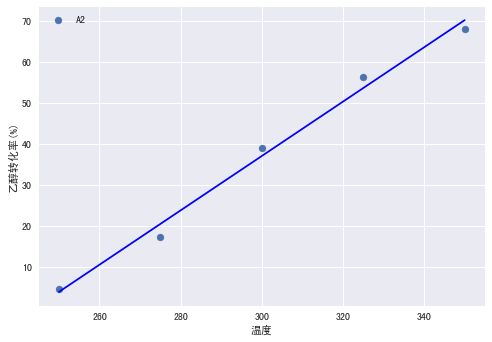

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


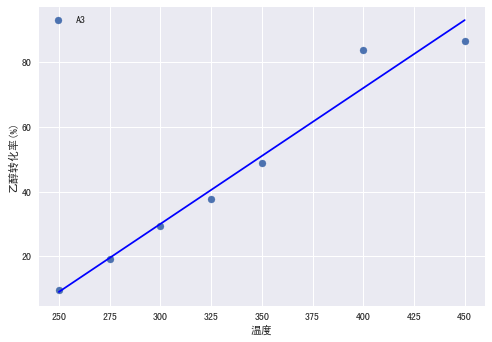

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


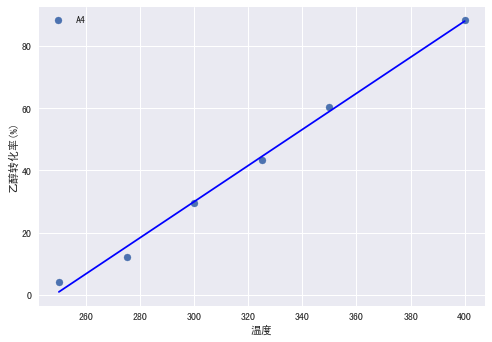

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


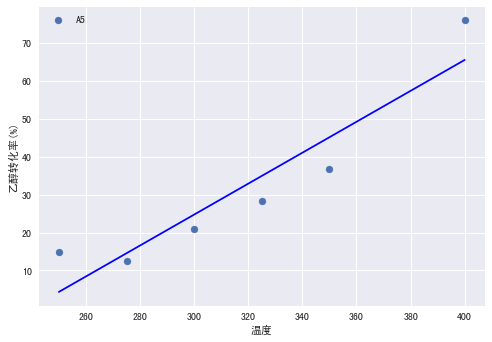

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


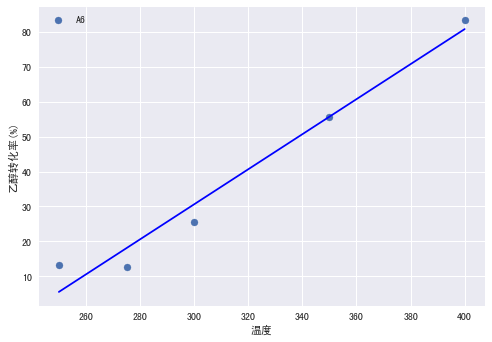

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


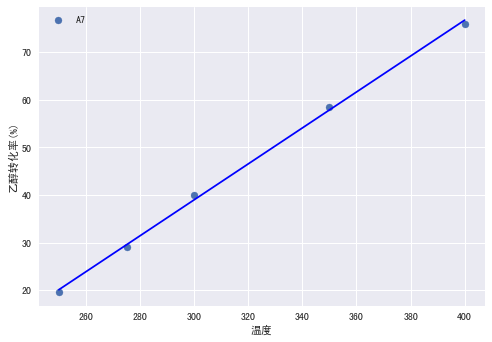

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


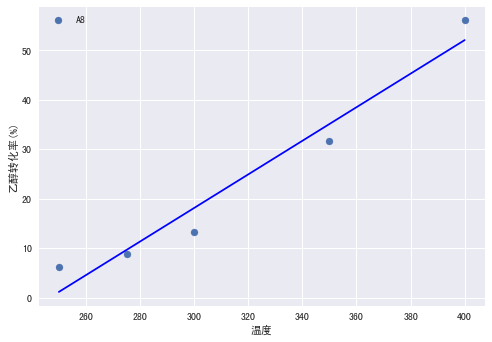

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


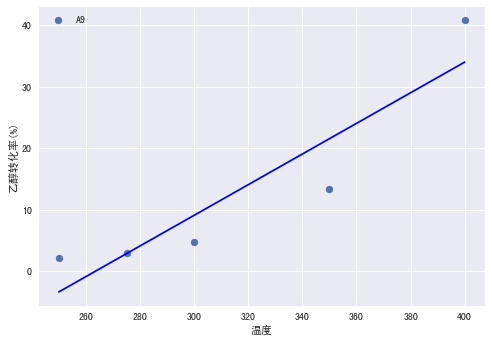

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


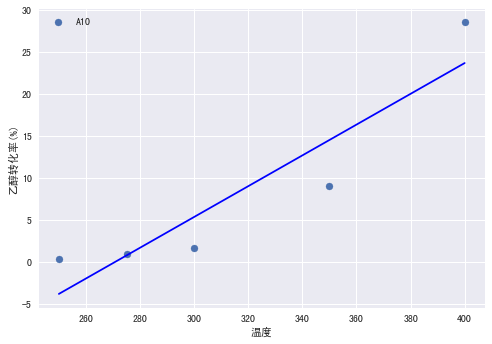

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


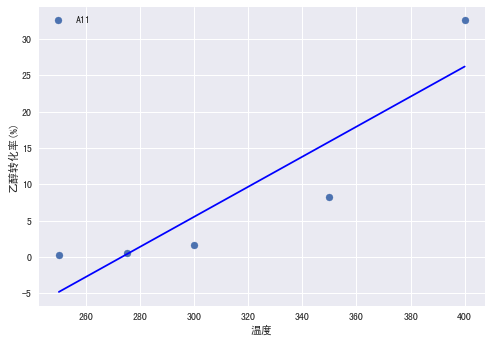

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


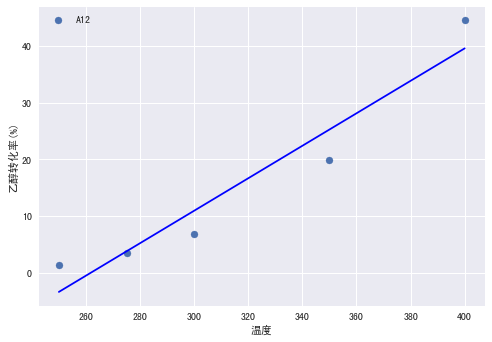

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


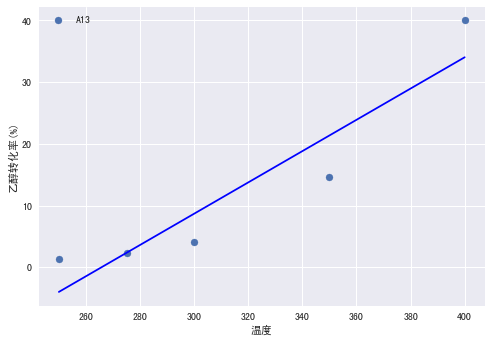

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


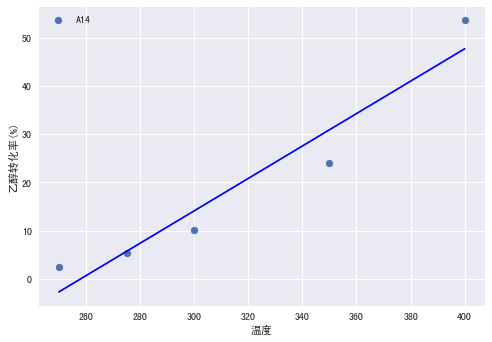

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


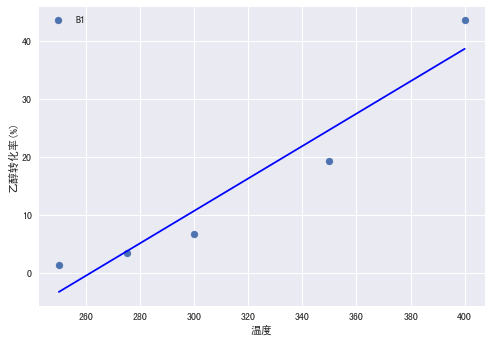

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


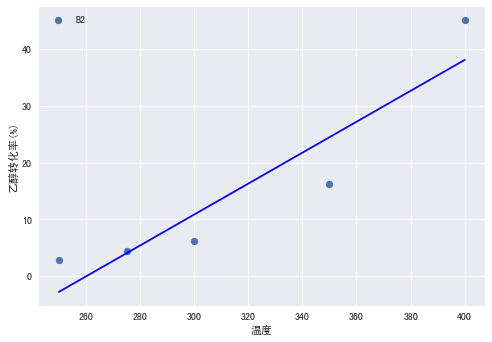

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


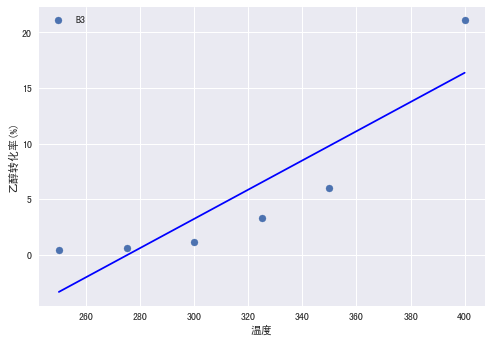

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


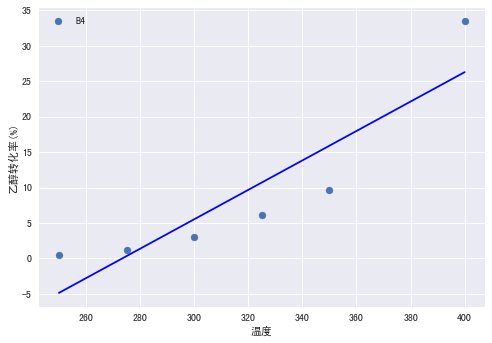

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


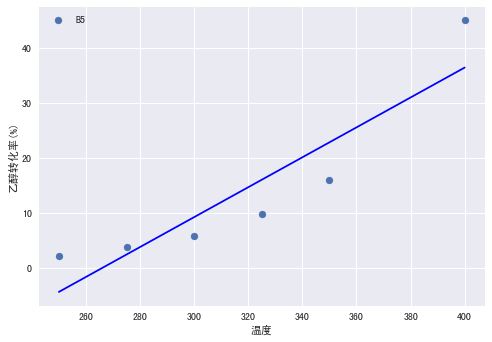

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


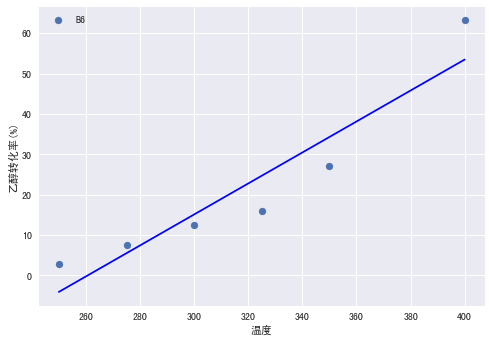

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


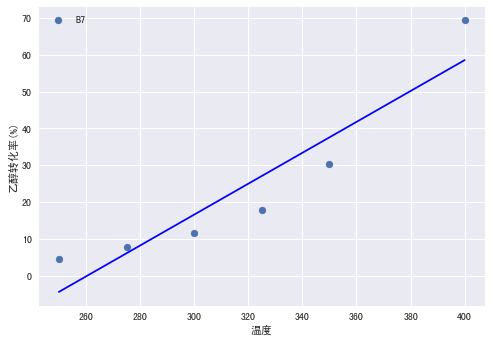

In [19]:
from sklearn import linear_model
from sklearn.feature_selection import f_regression

linear = []
# 线性模型
for item in data['组合编号'].unique():
  y = grouped.get_group(item)['乙醇转化率(%)'].values.reshape(-1,1)
  x = grouped.get_group(item)['温度'].values.reshape(-1,1)
  plt.xlabel('温度')
  plt.ylabel('乙醇转化率(%)')

  # Initialize model
  regression_model = linear_model.LinearRegression()
  # Train the model using the mtcars data
  regression_model.fit(X = x,  y = y)

  # # Check trained model y-intercept
  # print(regression_model.intercept_)

  # # Check trained model coefficients
  # print(regression_model.coef_)

  # F-test: return F value and p value
  f_regression(X = x, y=y, center=True)

  prediction = regression_model.predict(X = x)

  # # Actual - prediction = residuals
  # residuals = y - prediction
  # SSResiduals = (residuals**2).sum()

  # SSTotal = ((y - y.mean())**2).sum()

  # # R-squared 
  # R_squared1 = - (SSResiduals/SSTotal)

  # 或者直接这个就可以得到R方
  linear.append(regression_model.score(X = x,  y = y))
  
  # Plot regression line
  plt.plot(x,      # Explanitory variable
         prediction,  # Predicted values
         color="blue");
  
  plt.scatter(x, y,label = item)
  plt.legend()
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


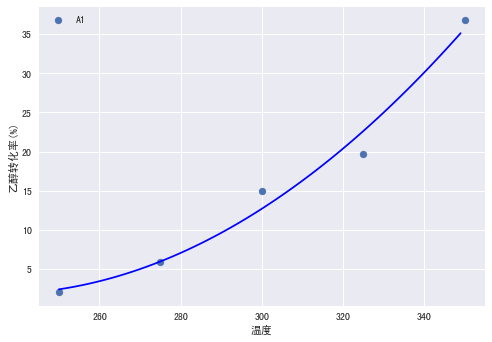

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


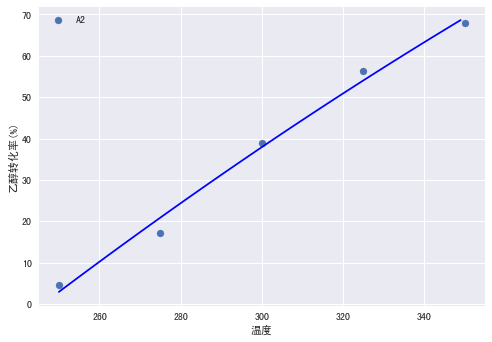

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


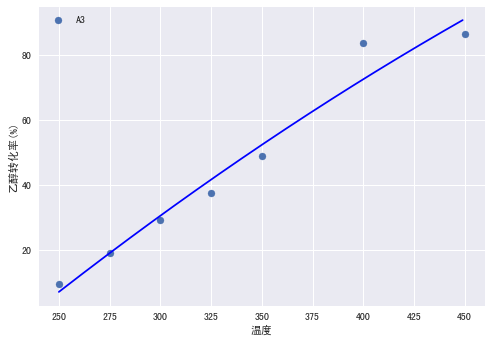

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


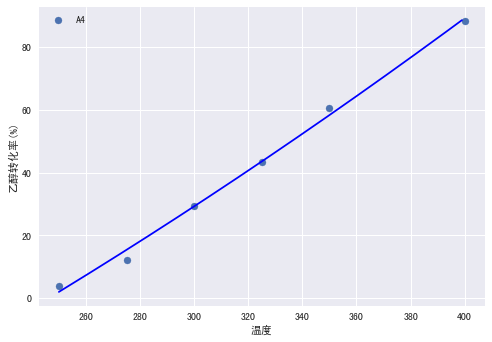

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


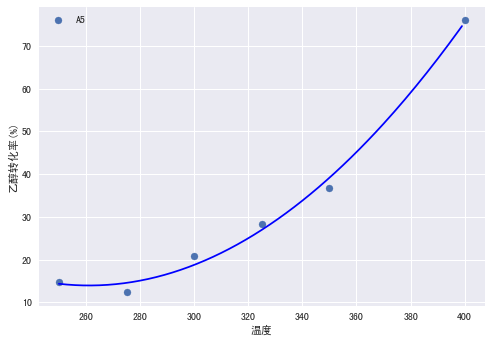

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


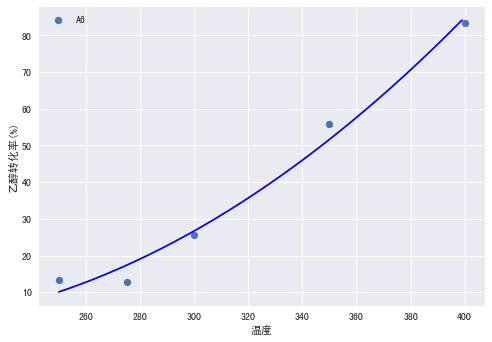

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


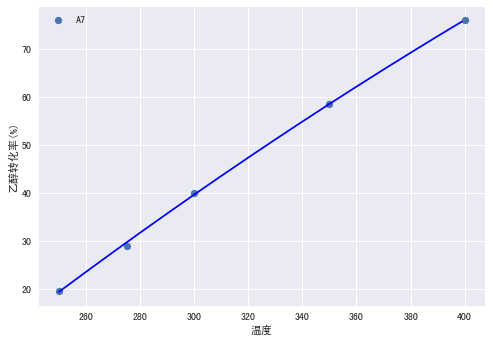

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


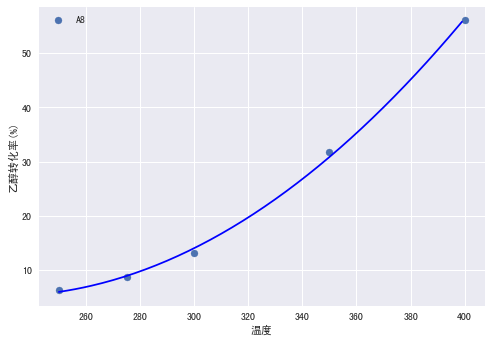

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


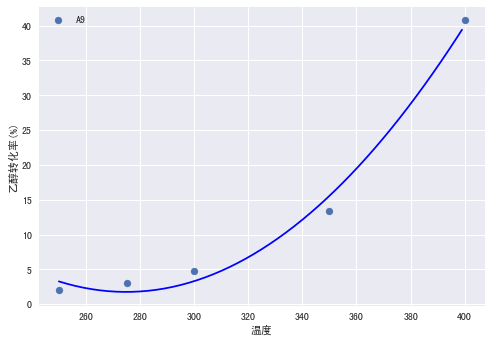

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


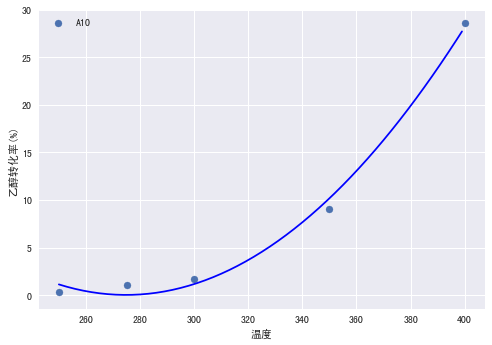

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


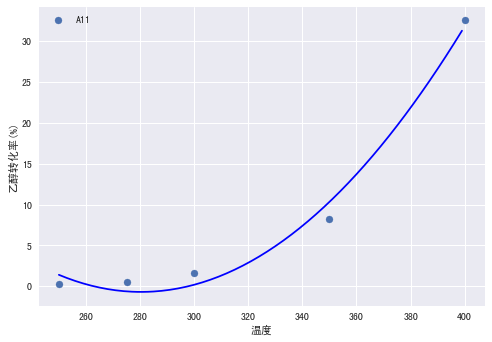

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


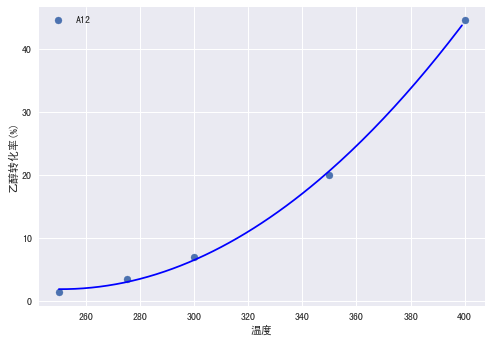

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


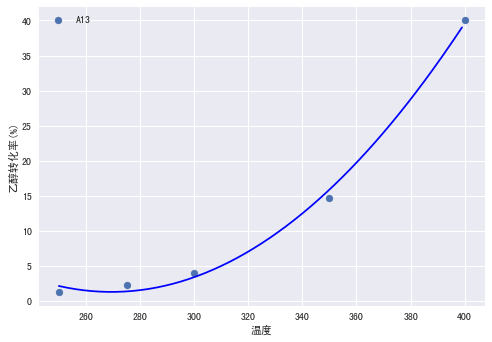

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


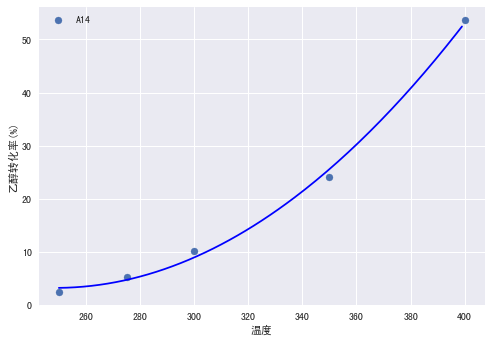

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


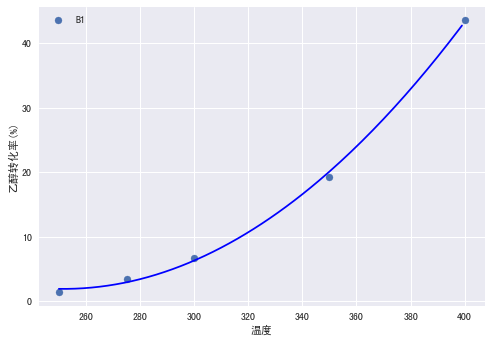

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


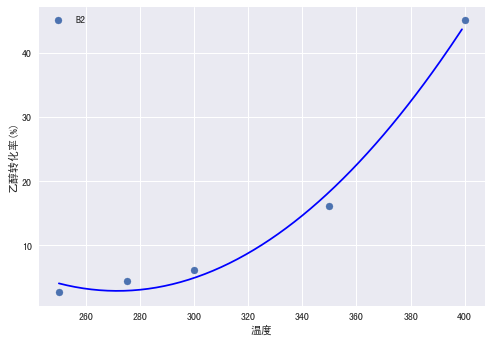

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


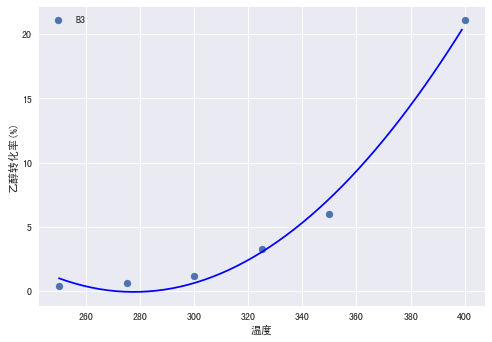

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


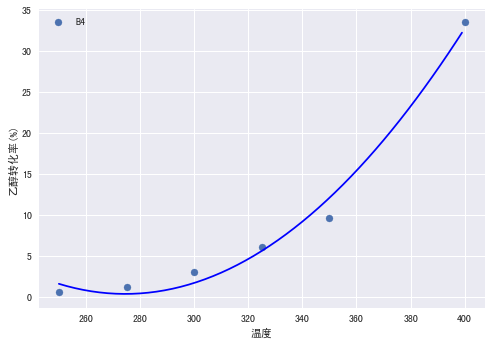

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


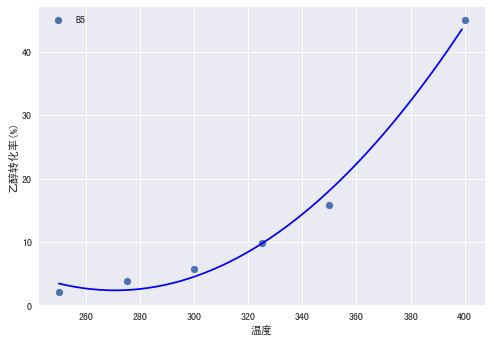

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


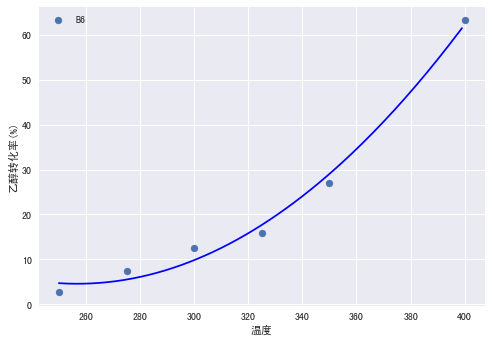

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


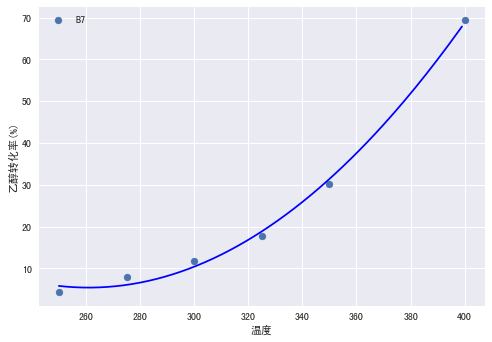

In [20]:
poly = []
# 线性模型
for item in data['组合编号'].unique():
  y = grouped.get_group(item)['乙醇转化率(%)']
  x = grouped.get_group(item)['温度']
  plt.xlabel('温度')
  plt.ylabel('乙醇转化率(%)')

  # Initialize model
  poly_model = linear_model.LinearRegression()

  # Make a DataFrame of predictor variables
  predictors = pd.DataFrame([x,           # Include weight
                             x**2]).T     # Include weight squared

  # Train the model using the new_cars data
  poly_model.fit(X = predictors, 
                 y = y)

  # # Check trained model y-intercept
  # print("Model intercept")
  # print(poly_model.intercept_)

  # # Check trained model coefficients (scaling factor given to "wt")
  # print("Model Coefficients")
  # print(poly_model.coef_)

  # # Check R-squared
  # print("Model Accuracy:")
  poly.append(poly_model.score(X = predictors, 
                 y = y))
  
  x_range = np.arange(min(x.values),max(x.values))
  predictors = pd.DataFrame([x_range,           # Include weight
                             x_range**2]).T     # Include weight squared

  prediction=poly_model.predict(X = predictors)
  # Plot regression line
  
  plt.plot(x_range,      # Explanitory variable
         prediction,  # Predicted values
         color="blue");
  
  plt.scatter(x, y,label = item)
  plt.legend()
  plt.show()

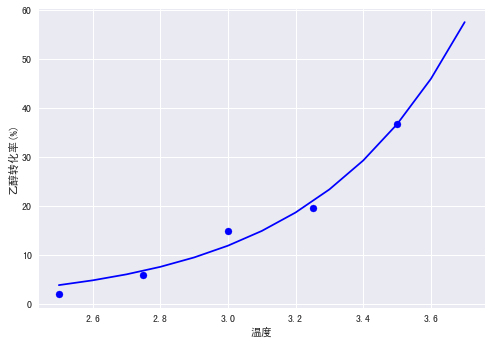

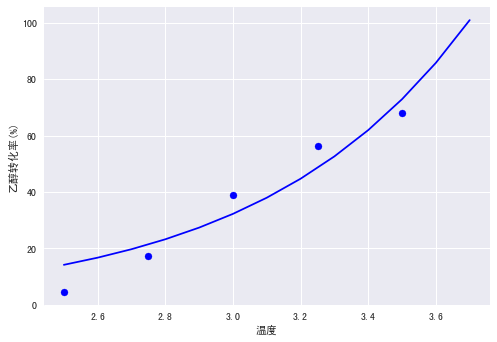

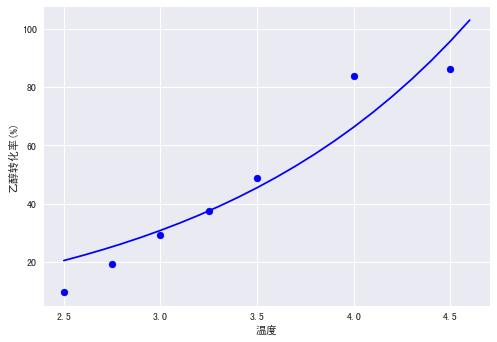

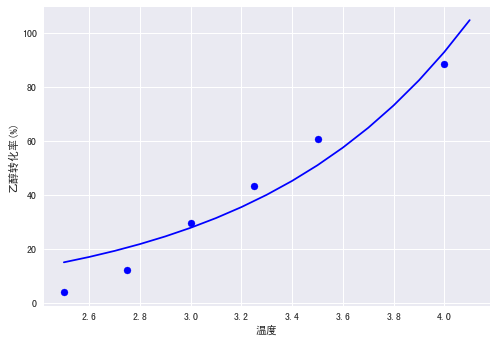

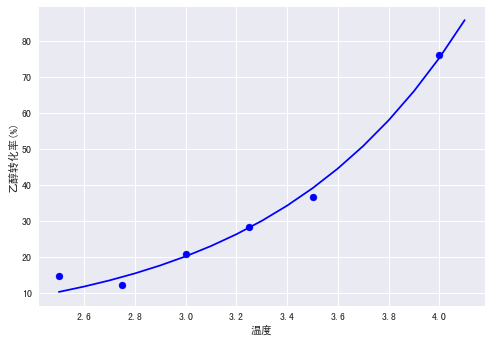

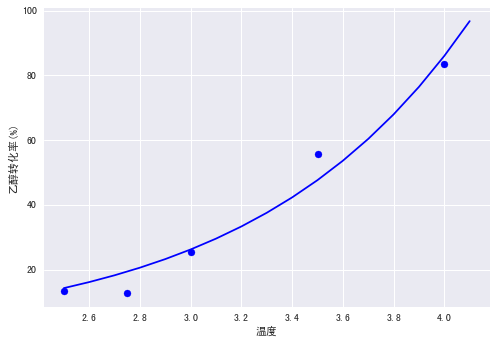

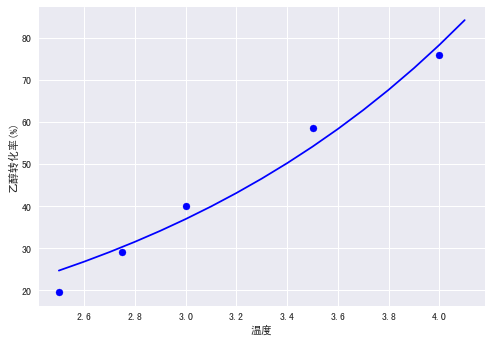

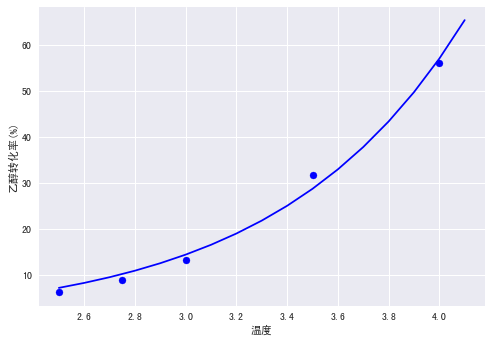

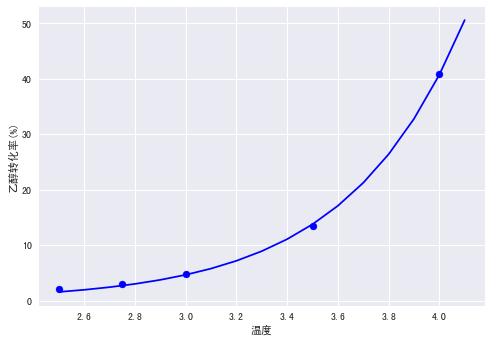

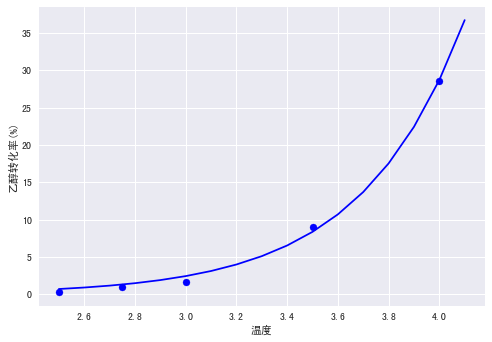

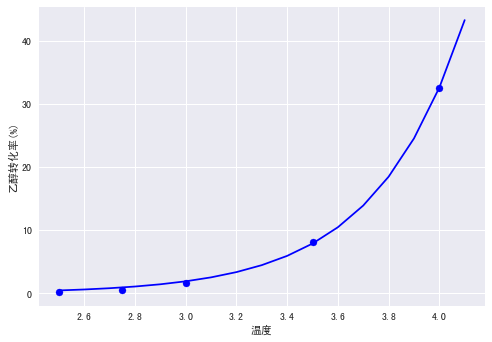

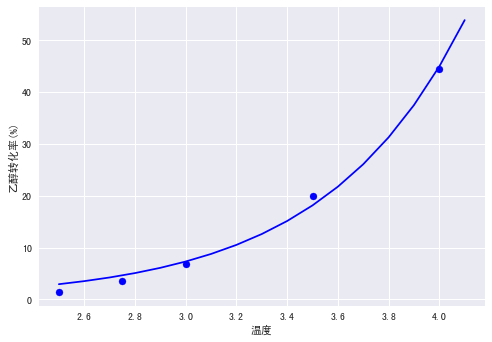

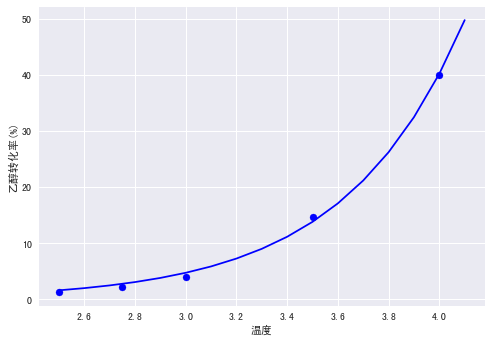

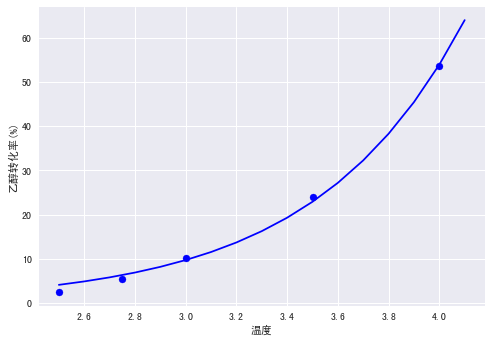

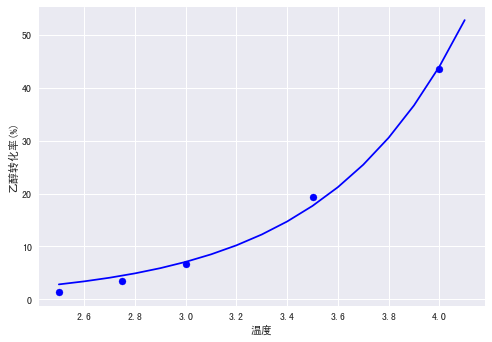

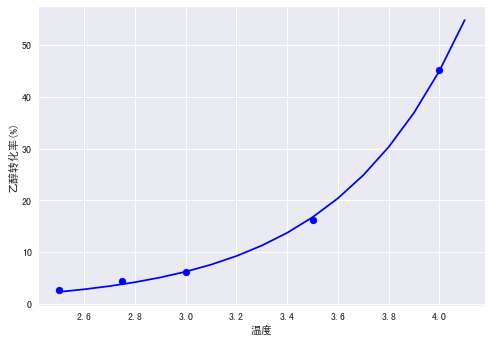

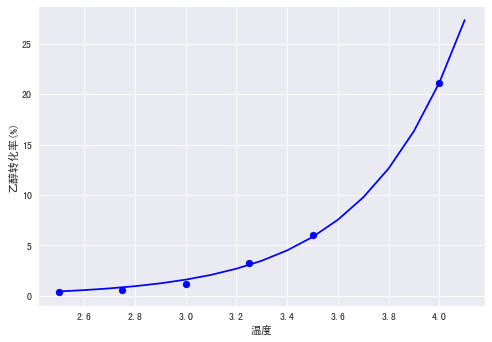

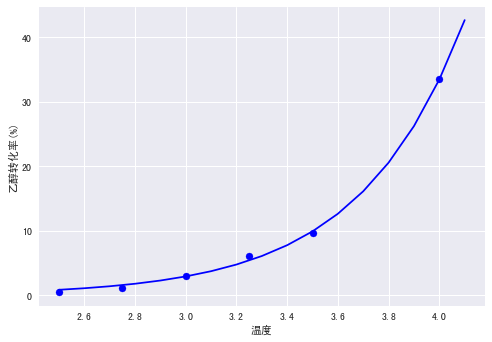

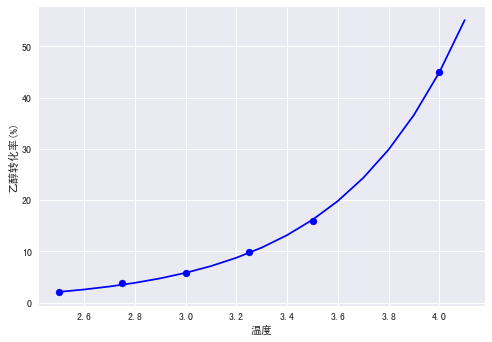

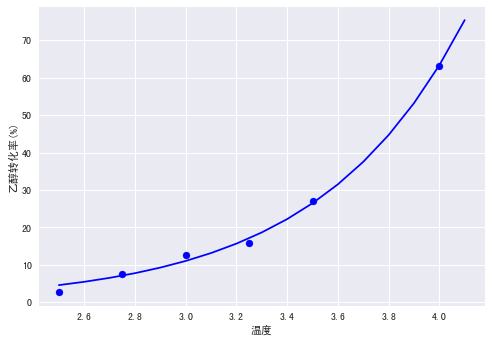

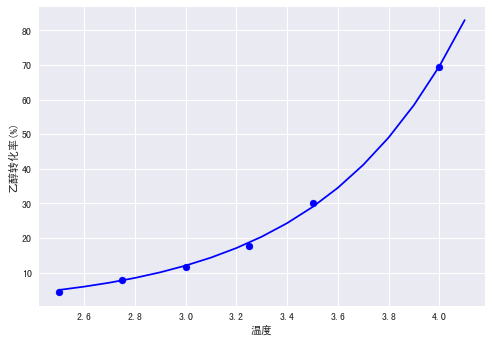

In [21]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-

#导入必要的包
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
#生成e指数函数
def func(x,a,b):
    return a*np.exp(b*x) - a
exp = []
# 指数模型
for item in data['组合编号'].unique():
  y = grouped.get_group(item)['乙醇转化率(%)'].values
  x = grouped.get_group(item)['温度'].values/100
  plt.xlabel('温度')
  plt.ylabel('乙醇转化率(%)')

  #拟合
  popt, pcov = curve_fit(func,x,y)

  #获得拟合后的参数
  a = popt[0]
  b = popt[1]

  #计算拟合所得数据
  x_range = np.arange(min(x),max(x)+0.2,0.1)
  y2 = func(x_range,a,b)
  prediction = func(x,a,b)
  residuals = y - prediction
  SSResiduals = (residuals**2).sum()

  SSTotal = ((y - y.mean())**2).sum()

  # R-squared 
  R_squared1 = 1 - (SSResiduals/SSTotal)
  exp.append(R_squared1)

  plot1 = plt.scatter(x,y, color="blue")

  plot2 = plt.plot(x_range,y2, color="blue")

  plt.legend()

  plt.show()


In [22]:
evaluate = pd.DataFrame({'线性':linear,'二次':poly,'指数':exp})
evaluate

,线性,二次,指数
0,0.932173,0.979748,0.979918
1,0.990006,0.991080,0.912994
2,0.964275,0.966320,0.897587
3,0.995030,0.995911,0.932415
4,0.873380,0.994027,0.989160
5,0.967449,0.986032,0.968725
6,0.998786,0.999708,0.970329
7,0.954815,0.999039,0.991936
8,0.848184,0.990262,0.999550
9,0.851679,0.994009,0.997823


然后C4烯烃的选择性也是基本一样，太长了这里就不放了。接下来要处理350度时给定的催化剂组合在一次实验不同时间的测试结果进行分析。

数据给的很少，具体如下：

In [23]:
data2 = pd.read_excel("附件2.xlsx")
data2

,时间（min）,乙醇转化率(%),乙烯选择性,C4烯烃选择性,乙醛选择性,碳数为4-12脂肪醇,甲基苯甲醛和甲基苯甲醇,其他
0,20,43.547389,4.23,39.90,5.17,39.70,2.58,8.42
1,70,37.788146,4.28,38.55,5.60,37.36,4.28,9.93
2,110,36.556360,4.46,36.72,6.37,32.39,4.63,15.43
3,163,32.721857,4.63,39.53,7.82,31.29,4.80,11.93
4,197,31.710097,4.62,38.96,8.19,31.49,4.26,12.48
5,240,29.854230,4.76,40.32,8.42,32.36,4.48,9.66
6,273,29.906009,4.68,39.04,8.79,30.86,3.95,12.68


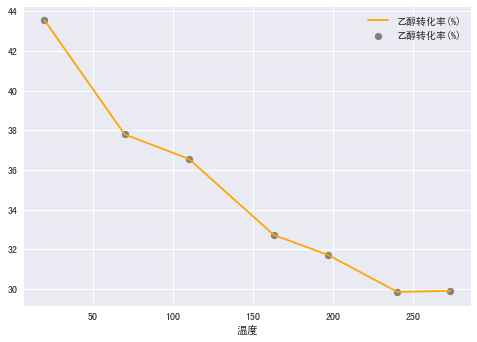

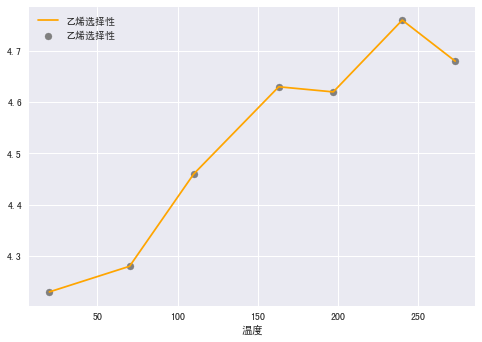

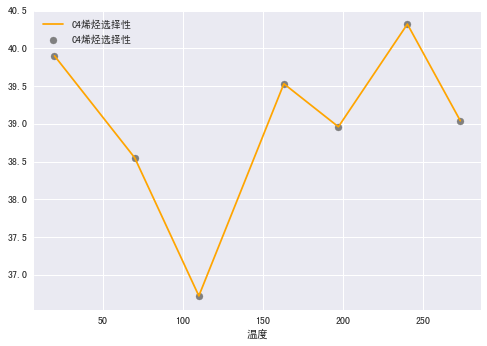

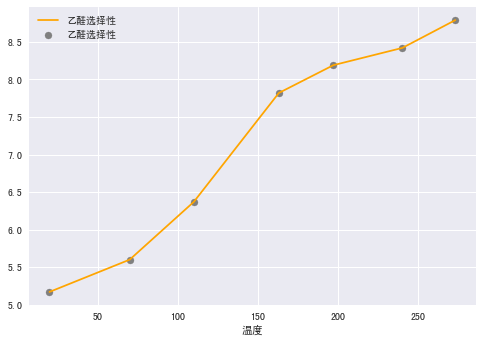

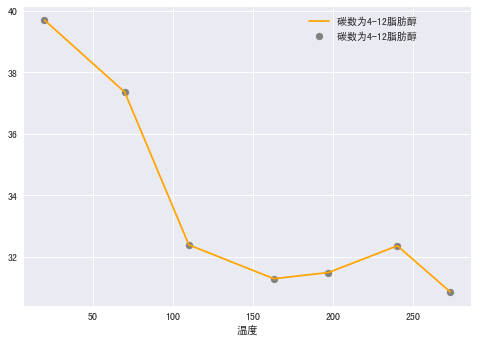

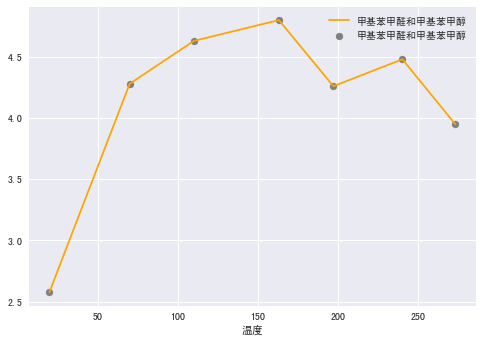

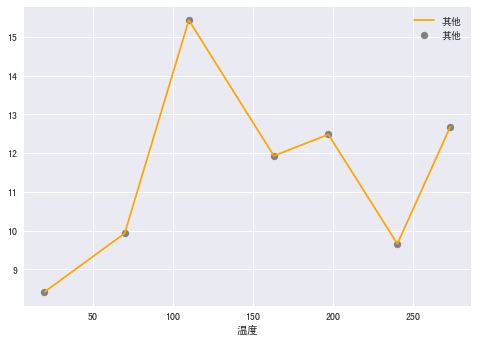

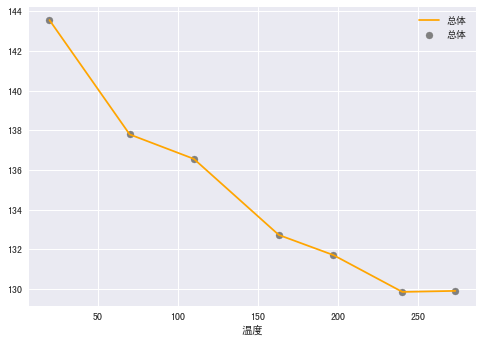

In [24]:
x = [20,70,110,163,197,240,273]
all_sum = 0
for col in data2.columns[1:]:
  y = data2[col].values
  all_sum += y
  plt.scatter(x ,y, color="grey",label = col)
  plt.plot(x ,y, color="orange",label = col)
  plt.xlabel('温度')
  plt.legend()
  plt.show()

y = all_sum 
plt.scatter(x ,y, color="grey",label = '总体')
plt.plot(x ,y, color="orange",label = '总体')
plt.xlabel('温度')
plt.legend()
plt.show()

比较明显的是乙醇转换率和乙醛选择性，基本都是线性关系。随着时间的变化，可以看到最后一段的其他杂质or中间产物是有明显增加，而其他的转化率（选择性）除了乙醛是增加的，都减小了。然后我增加了一个总体转换率的图像，可以看到也是明显递减的。

这题的解释可以从化学反应的角度来分析，去查点资料，化学平衡啥的。

## 第二问

看到其实自变量都是一些离散的值，而且很少，可以考虑多变量作图。观察发现石英那组催化效果很差，查资料了解石英只是用来防暴沸的，所以删掉这组。

In [25]:
data_new = data.drop([54,55,56,57,58],axis = 0)

In [26]:
data_new['CoSiO质量'].unique()

array([200,  50,  67,  33, 100,  10,  25,  75])

In [27]:
data_new['CoSiO浓度'].unique()

array([1. , 2. , 0.5, 5. ])

In [28]:
data_new['HAP质量'].unique()

array([200,  50,  67,  33, 100,  10,  25,  75])

In [29]:
data_new['乙醇浓度'].unique()

array([1.68, 0.9 , 0.3 , 2.1 ])

In [30]:
data_new

,温度,乙醇转化率(%),乙烯选择性（%）,C4烯烃选择性(%),乙醛选择性(%),碳数为4-12脂肪醇 选择性(%),甲基苯甲醛和甲基苯甲醇选择性(%),其他生成物的选择性(%),组合编号,CoSiO质量,CoSiO浓度,HAP质量,乙醇浓度
0,250,2.067169,1.17,34.05,2.41,52.59,0.00,9.78,A1,200,1.0,200,1.68
1,275,5.851721,1.63,37.43,1.42,53.21,0.00,6.31,A1,200,1.0,200,1.68
2,300,14.968891,3.02,46.94,4.71,35.16,1.00,9.17,A1,200,1.0,200,1.68
3,325,19.681359,7.97,49.70,14.69,15.16,2.13,10.35,A1,200,1.0,200,1.68
4,350,36.801017,12.46,47.21,18.66,9.22,1.69,10.76,A1,200,1.0,200,1.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,275,7.900000,0.15,6.62,3.49,79.79,5.67,4.28,B7,100,1.0,100,0.90
110,300,11.700000,0.20,12.86,6.47,68.02,6.71,5.74,B7,100,1.0,100,0.90
111,325,17.800000,1.42,18.45,7.94,59.12,7.14,5.93,B7,100,1.0,100,0.90
112,350,30.200000,1.53,25.05,10.30,49.36,6.30,7.46,B7,100,1.0,100,0.90


In [31]:
grouped = data_new.groupby('组合编号')

首先来看装料方式对于结果的影响：

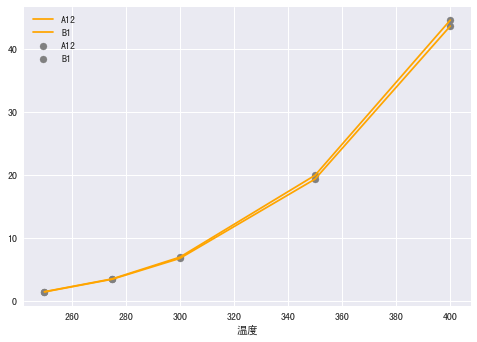

In [32]:
category1 = ['A12','B1']
x = [20,70,110,163,197,240,273]
all_sum = 0
for col in category1:
  y = grouped.get_group(col)['乙醇转化率(%)']
  x = grouped.get_group(col)['温度']
  
  plt.scatter(x ,y, color="grey",label = col)
  plt.plot(x ,y, color="orange",label = col)
plt.xlabel('温度')
plt.legend()
plt.show()


基本没有差别，所以可以忽略装料方式的影响。

接下来先控制变量，这里画图的方式有多条折线(一个变量的不同取值)，以及并列直方图，4个催化剂指标以及温度和产物浓度的关系，可以参考下图：

In [33]:
# 乙醇浓度
grouped_ethanol = data.groupby(['CoSiO质量','CoSiO浓度','HAP质量'])
# for tem in data['温度'].unique():
#   sns.histplot(grouped.get_group(tem)['乙醇转化率(%)'] ,bins=20, kde=True)
#   plt.show()
for key, value in grouped_ethanol:
  # 选出组数大于1的
  if(len(value) >= 10):
    a = value.columns
    print(key)
    print(value[[a[0],a[1],a[2],a[9],a[10],a[11],a[12]]]) # 显示需要的列
    print("")


(50, 1.0, 50)
      温度   乙醇转化率(%)  乙烯选择性（%）  CoSiO质量  CoSiO浓度  HAP质量  乙醇浓度
34   250  19.656291      0.18       50      1.0     50  0.30
35   275  29.044956      0.31       50      1.0     50  0.30
36   300  39.984366      0.57       50      1.0     50  0.30
37   350  58.604997      2.28       50      1.0     50  0.30
38   400  76.027416      8.31       50      1.0     50  0.30
39   250   6.265737      0.14       50      1.0     50  0.90
40   275   8.761570      0.20       50      1.0     50  0.90
41   300  13.179048      0.52       50      1.0     50  0.90
42   350  31.720663      1.45       50      1.0     50  0.90
43   400  56.116390      6.40       50      1.0     50  0.90
44   250   2.053162      0.16       50      1.0     50  2.10
45   275   3.002572      0.33       50      1.0     50  2.10
46   300   4.729201      0.53       50      1.0     50  2.10
47   350  13.392745      2.84       50      1.0     50  2.10
48   400  40.797163      6.36       50      1.0     50  2.10
59   250  

可以对A1-A3,A2-A5,A7-A8-A9-A12-B1-B5,B2-B7进行绘图观察，这里选择的是组数最多的：

<function matplotlib.pyplot.show(*args, **kw)>

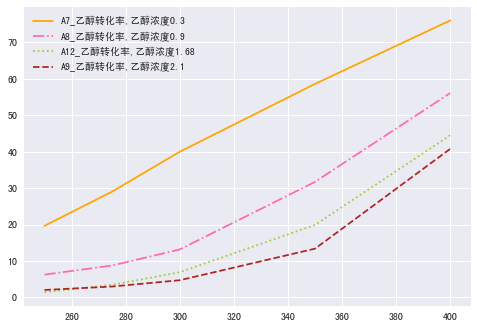

In [34]:
# 乙醇浓度
group_cate = data.groupby('组合编号')
quality1 = np.array([250,275,300,350,400]) # A7-A8-A9-A12

number_A7 = group_cate.get_group('A7')['乙醇转化率(%)'].values
number_A8 = group_cate.get_group('A8')['乙醇转化率(%)'].values
number_A9 = group_cate.get_group('A9')['乙醇转化率(%)'].values
number_A12 = group_cate.get_group('A12')['乙醇转化率(%)'].values

# 使用plot函数绘制乙醇转化率图像
plt.plot(quality1,number_A7,color='orange',linestyle='-',label='A7_乙醇转化率,乙醇浓度0.3')
plt.plot(quality1,number_A8,color='hotpink', linestyle='-.',label='A8_乙醇转化率,乙醇浓度0.9')
plt.plot(quality1,number_A12,color='yellowgreen', linestyle=':',label='A12_乙醇转化率,乙醇浓度1.68')
plt.plot(quality1,number_A9,color='firebrick', linestyle='--',label='A9_乙醇转化率,乙醇浓度2.1')

plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

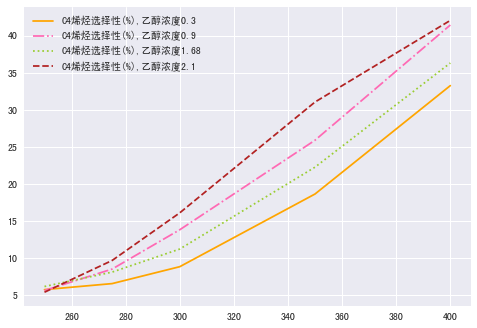

In [35]:
#C4 浓度
number_A7 = group_cate.get_group('A7')['C4烯烃选择性(%)'].values
number_A8 = group_cate.get_group('A8')['C4烯烃选择性(%)'].values
number_A9 = group_cate.get_group('A9')['C4烯烃选择性(%)'].values
number_A12 = group_cate.get_group('A12')['C4烯烃选择性(%)'].values

# 使用plot函数绘制乙醇转化率图像
plt.plot(quality1,number_A7,color='orange',linestyle='-',label='C4烯烃选择性(%),乙醇浓度0.3')
plt.plot(quality1,number_A8,color='hotpink', linestyle='-.',label='C4烯烃选择性(%),乙醇浓度0.9')
plt.plot(quality1,number_A12,color='yellowgreen', linestyle=':',label='C4烯烃选择性(%),乙醇浓度1.68')
plt.plot(quality1,number_A9,color='firebrick', linestyle='--',label='C4烯烃选择性(%),乙醇浓度2.1')

plt.legend()
plt.show

可以看出乙醇转换率是随着乙醇浓度增高而降低的，而C4烯烃的产量的变化有些波动。

<function matplotlib.pyplot.show(*args, **kw)>

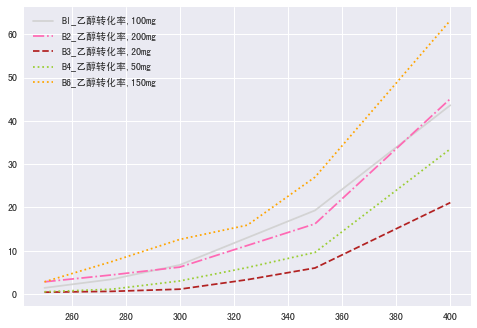

In [36]:
# CoSio2,HAP质量和相同
quality1 = np.array([250,275,300,350,400]) # Bl B2
quality2 = np.array([250,275,300,325,350,400]) #B3B4B6
number_Bl = [1.4,3.4,6.7,19.3,43.6]
number_B2 = [2.8,4.4,6.2,16.2,45.1]
number_B3 =[0.4,0.6,1.1,3.3,6.0,21.1]
number_B4 = [0.5,1.1,3.0,6.1,9.6,33.5]
number_B6 = [2.8,7.5,12.6,15.9,27.0,63.2]

# Bl B2 B3 B4 B6 C4烯由选择率
number_Bl_1 = [6.32,8.25,12.28,25.97,41.08]
number_B2_1 = [3.26,4.97,9.32,22.88,38.7]
number_B3_1 = [2.85,5.35,7.61,7.74,13.81,21.21]
number_B4_1 = [6.62,6.62,5.05,8.33,13.1,21.45]
number_B6_1 = [4.5,4.79,8.77,16.06,22.41,30.48]

# 使用plot函数绘制乙醇转化率图像
plt.plot(quality1,number_Bl,color='lightgrey',linestyle='-',label='Bl_乙醇转化率,100mg')
plt.plot(quality1,number_B2,color='hotpink', linestyle='-.',label='B2_乙醇转化率,200mg')
plt.plot(quality2,number_B3,color='firebrick', linestyle='--',label='B3_乙醇转化率,20mg')
plt.plot(quality2,number_B4,color='yellowgreen', linestyle=':',label='B4_乙醇转化率,50mg')
plt.plot(quality2,number_B6,color='orange', linestyle=':',label='B6_乙醇转化率,150mg')

plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

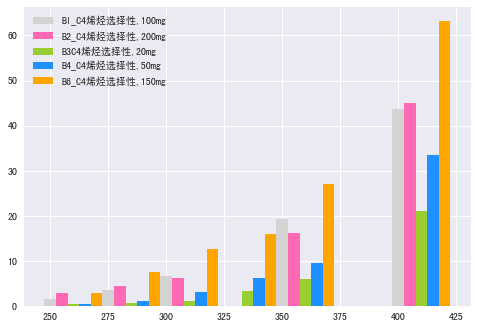

In [37]:
# 使用bar函数绘制C4烯选择性图像
plt.bar(quality1,number_Bl,width=5,color='lightgrey',linestyle='-',label='Bl_C4烯烃选择性,100mg')
plt.bar(quality1+5,number_B2,width=5,color='hotpink', linestyle='-.',label='B2_C4烯烃选择性,200mg')
plt.bar(quality2+10,number_B3,width=5,color='yellowgreen', linestyle='--',label='B3C4烯烃选择性,20mg')
plt.bar(quality2+15,number_B4,width=5,color='dodgerblue', linestyle=':',label='B4_C4烯烃选择性,50mg')
plt.bar(quality2+20,number_B6,width=5,color='orange', linestyle=':',label='B6_C4烯烃选择性,150mg')

plt.legend()
plt.show

然后剩下的几组同理即可。

### 整体建模

整体用方差检验，显著性分析，然后再对单因素可以进行多重检验，这个python很难做，用spss处理。

In [38]:
# 鸽

各因素对于最后产物影响的关系可以尝试用多元回归模型、随机森林建模。

多元回归：尝试线性多元回归以及二次多元回归。首先尝试线性多元回归：

In [39]:
x_values = data_new[['CoSiO质量','CoSiO浓度','HAP质量','乙醇浓度','温度']].values
y_values = data_new['C4烯烃选择性(%)'].values

Predicted: [39.81717335], Target: [53.43]
Predicted: [19.25012772], Target: [13.1]
Predicted: [49.02715391], Target: [49.9]
Predicted: [30.6071928], Target: [36.85]
Predicted: [7.37975462], Target: [8.25]
Predicted: [11.9847449], Target: [11.22]
Predicted: [8.87338851], Target: [7.61]
Predicted: [15.98844616], Target: [17.28]
Predicted: [18.08336907], Target: [13.81]
Predicted: [-1.21506179], Target: [5.75]
Predicted: [25.19842672], Target: [30.62]
Predicted: [17.20489933], Target: [18.64]
Predicted: [25.08392094], Target: [22.88]
Predicted: [0.8301666], Target: [6.62]
Predicted: [16.60361031], Target: [10.12]
Predicted: [35.02357142], Target: [38.23]
Predicted: [22.40902037], Target: [15.34]
Predicted: [20.59343644], Target: [19.6]
Predicted: [28.25732164], Target: [49.7]
Predicted: [8.59404953], Target: [9.68]
Predicted: [13.30707137], Target: [12.74]
Predicted: [12.18723169], Target: [5.5]
R-squared: 0.80


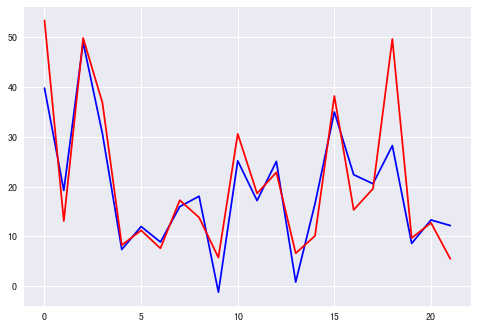

In [40]:
# 线性多元回归
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2,random_state = 99)
X = X_train
y = y_train.reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y)
y_test = y_test.reshape(-1,1)
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
print('R-squared: %.2f' % model.score(X_test, y_test))

x_range = np.arange(0,len(predictions))
plt.plot(x_range, predictions.reshape(-1), color = 'blue')
plt.plot(x_range, y_test.reshape(-1), color = 'red')

plt.legend()
plt.show()

In [57]:
import numpy as np
import statsmodels.formula.api as smf
import pylab as plt
 
x1 = x_values[:,0] 
x2 = x_values[:,1] 
x3 = x_values[:,2]  
x4 = x_values[:,3] 
x5 = x_values[:,4] 

y = y_values 
d = {'y': y, 'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5}
# re1 = smf.ols('y~x1+x2', d).fit()
# print('线性回归的残差方差：', re1.mse_resid)
# re2 = smf.ols('y~x1+x2+I(x1**2)+I(x2**2)', d).fit()
# print('纯二次的残差方差：', re2.mse_resid)
# re3 = smf.ols('y~x1*x2', d).fit()
# print('交叉二次的残差方差：', re3.mse_resid)
ste = ''
for i in range(5):
  for j in range(5):
    ste = ste + '+x'+str(i) + '*x' + str(j) 

re1 = smf.ols('y~x1+x2+x3+x4+x5', d).fit()
print('完全二次的残差方差：', re1.mse_resid)
# print('预测值：', re2.predict({'x1': 170, 'x2': 160}))
print(re1.summary())

完全二次的残差方差： 51.011821422499914
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     70.60
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           8.94e-29
Time:                        07:32:47   Log-Likelihood:                -366.40
No. Observations:                 109   AIC:                             742.8
Df Residuals:                     104   BIC:                             756.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.1859 

效果不是很好，来试试二次的多元回归：

In [53]:
# 来试试二次多元回归
# 使用
ste = ''
for i in range(5):
  for j in range(i+1):
    if i != j:
      if i == 1 and j == 0:
        ste = ste + 'x'+str(i+1) + '*x' + str(j+1) 
      else:
        ste = ste + '+x'+str(i+1) + '*x' + str(j+1) 
ste

'x2*x1+x3*x1+x3*x2+x4*x1+x4*x2+x4*x3+x5*x1+x5*x2+x5*x3+x5*x4'

In [54]:
import numpy as np
import statsmodels.formula.api as smf
import pylab as plt
 
x1 = x_values[:,0] 
x2 = x_values[:,1] 
x3 = x_values[:,2]  
x4 = x_values[:,3] 
x5 = x_values[:,4] 

y = y_values 
d = {'y': y, 'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5}
# re1 = smf.ols('y~x1+x2', d).fit()
# print('线性回归的残差方差：', re1.mse_resid)
# re2 = smf.ols('y~x1+x2+I(x1**2)+I(x2**2)', d).fit()
# print('纯二次的残差方差：', re2.mse_resid)
# re3 = smf.ols('y~x1*x2', d).fit()
# print('交叉二次的残差方差：', re3.mse_resid)
ste = ''
for i in range(5):
  for j in range(5):
    ste = ste + '+x'+str(i) + '*x' + str(j) 

re4 = smf.ols('y~x1+x2+x3+x4+x5+x2*x1+x3*x1+x3*x2+x4*x1+x4*x2+x4*x3+x5*x1+x5*x2+x5*x3+x5*x4+I(x1**2)+I(x2**2)+I(x3**2)+I(x4**2)+I(x5**2)', d).fit()
print('完全二次的残差方差：', re4.mse_resid)
# print('预测值：', re2.predict({'x1': 170, 'x2': 160}))
print(re4.summary())

完全二次的残差方差： 39.39286459984414
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     29.03
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           5.04e-28
Time:                        07:30:35   Log-Likelihood:                -346.81
No. Observations:                 109   AIC:                             723.6
Df Residuals:                      94   BIC:                             764.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5429  

然后看到P值，进行一个初步的筛选，但是效果还是不行

In [55]:
import numpy as np
import statsmodels.formula.api as smf
import pylab as plt
 
x1 = x_values[:,0] 
x2 = x_values[:,1] 
x3 = x_values[:,2]  
x4 = x_values[:,3] 
x5 = x_values[:,4] 

y = y_values 
d = {'y': y, 'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5}
# re1 = smf.ols('y~x1+x2', d).fit()
# print('线性回归的残差方差：', re1.mse_resid)
# re2 = smf.ols('y~x1+x2+I(x1**2)+I(x2**2)', d).fit()
# print('纯二次的残差方差：', re2.mse_resid)
# re3 = smf.ols('y~x1*x2', d).fit()
# print('交叉二次的残差方差：', re3.mse_resid)
ste = ''
for i in range(5):
  for j in range(5):
    ste = ste + '+x'+str(i) + '*x' + str(j) 

re4 = smf.ols('y~x1+x2+x3+x4*x1+x4*x2+x4*x3+x5*x1+x5*x2+x5*x3+I(x2**2)+I(x5**2)', d).fit()
print('完全二次的残差方差：', re4.mse_resid)
# print('预测值：', re2.predict({'x1': 170, 'x2': 160}))
print(re4.summary())

完全二次的残差方差： 38.24502164282941
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     41.74
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           6.09e-31
Time:                        07:31:03   Log-Likelihood:                -347.47
No. Observations:                 109   AIC:                             716.9
Df Residuals:                      98   BIC:                             746.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0355  

接下来是随机森林回归和xgb的测试，效果都是要比多元回归好上不少的：

[随机森林参数设置](https://blog.csdn.net/VariableX/article/details/107190275?spm=1001.2101.3001.6650.2&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-2-107190275-blog-81952712.pc_relevant_multi_platform_featuressortv2dupreplace&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-2-107190275-blog-81952712.pc_relevant_multi_platform_featuressortv2dupreplace&utm_relevant_index=3)

在预测集模型的准确率为：
 0.8626027903202593
在训练集模型的准确率为：
 0.9233462255783738
综合准确率为：
 0.9131735850669325
[0.0758842736943673, 0.16654325873640793, 0.1083879733204177, 0.10125964278289891, 0.5479248514659082]
[0, 1, 2, 3, 4]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


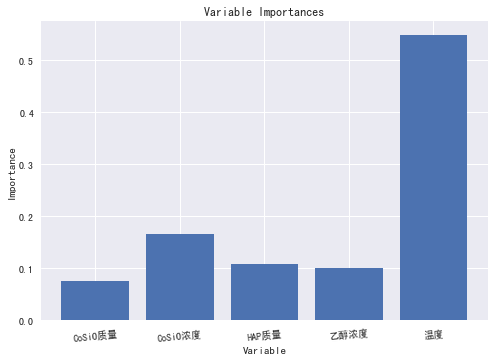

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.metrics import mean_squared_error,r2_score
x_values = data_new[['CoSiO质量','CoSiO浓度','HAP质量','乙醇浓度','温度']].values
y_values = data_new['C4烯烃选择性(%)'].values
clf = RF(n_estimators = 12, random_state = 39,max_depth = 15)

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=2022)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
clf.fit(x_train, y_train)
print('在预测集模型的准确率为：\n', clf.score(x_test, y_test))
print('在训练集模型的准确率为：\n', clf.score(x_train, y_train))
print('综合准确率为：\n', clf.score(x_values, y_values.reshape(-1,1)))

# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
print(importances)

feature_list = ['CoSiO质量','CoSiO浓度','HAP质量','乙醇浓度','温度']
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# Import matplotlib for plotting and use magic command for Jupyter Notebooks

import matplotlib.pyplot as plt
# Set the style
# plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
print(x_values)
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list,rotation=6)
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()


[07:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

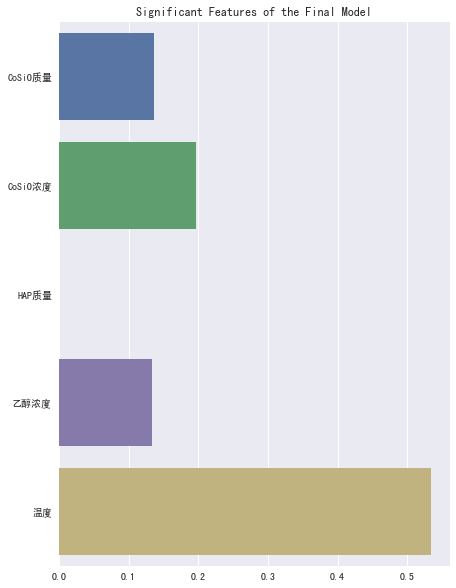

In [59]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error,r2_score
x_values = data_new[['CoSiO质量','CoSiO浓度','HAP质量','乙醇浓度','温度']].values
y_values = data_new['C4烯烃选择性(%)'].values
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=2022)
param_grid = {'n_estimators': [25,50,100,120],
              'max_depth': [1,2,4,6]}
xgb = XGBRegressor()
gsearch = GridSearchCV(xgb, param_grid=param_grid, cv=5)
gsearch.fit(X_train,y_train)

model = gsearch.best_estimator_
y_pred = model.predict(X_test)
print("R^2 on test data: ", r2_score(y_test,y_pred))
print("R^2 on train data: ", r2_score(y_train,model.predict(X_train)))
print(gsearch.best_params_)

# 绘制模型特征重要性图
plt.figure(figsize=(7, 10))
sns.barplot(x=model.feature_importances_, y = feature_list)
plt.title('Significant Features of the Final Model')
plt.show()

## 第三问

遗传算法约束最优化

In [60]:
pip install geatpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 344 kB/s 


In [61]:
pip install gpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 959 kB 5.2 MB/s 
     |████████████████████████████████| 71 kB 9.3 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565162 sha256=a1a986330740091476af9462ee07ab91cfa1d91cdb72eb82acda150db777dd32
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=625af332edeb0e1068b2be06315be44241f56847f44c42a116c5baf7e278e420
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


<Figure size 4000x8000 with 0 Axes>

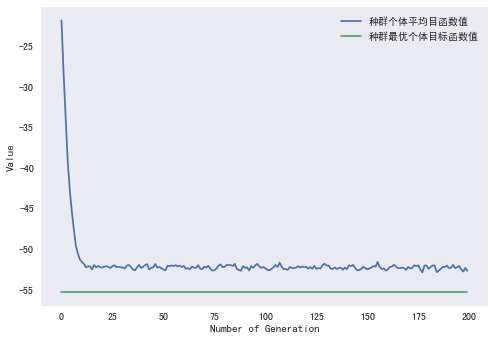

最优解的目标函数值： -55.30084228515625
最优解的决策变量值为：
x1= 183.3800164799951
x2= 0.7553816046966733
x3= 107.20636616107669
x4= 1.3235294117647058
x5= 393.18806079472625
用时： 9.892942667007446 秒


In [63]:
import geatpy as ea
import time

"""============================目标函数============================"""
def aim(Phen):  # 传入种群染色体矩阵解码后的基因表现型矩阵
    NIND = Phen.shape[0]
    result = np.zeros((NIND,1))
    for i in range(NIND):
        x_pred = np.array([Phen[i,:]])
        y_pred = model.predict(x_pred)
        result[i] = y_pred
        
    return -result
        

"""============================变量设置============================"""
range1 = [250,400] # 温度范围
range2 = [33,200]  # Co/SiO2质量
range3 = [0.5,5]   # Co负载量
range4 = [33,200]  # HAP质量
range5 = [0.3,2.1] # 乙醇添加速度

b = np.tile([1, 1],(5,1))  # 第一个决策变量边界，1表示包含范围的边界，0表示不包含

# 生成自变量的范围矩阵，使得第一行为所有决策变量的下界，第二行为上界
# CoSiO质量','CoSiO浓度','HAP质量','乙醇浓度','温度
ranges = np.vstack([range2,range3,range4,range5,range1])
ranges = ranges.T

# 生成自变量的边界矩阵
borders = b.T

varTypes = np.array([0]*5)  # 决策变量的类型，0表示连续，1表示离散

"""==========================染色体编码设置========================="""
Encoding = 'BG'  # 'BG'表示采用二进制/格雷编码
codes = [1]*5  # 决策变量的编码方式，两个1表示变量均使用格雷编码
precisions = [2]*5  # 决策变量的编码精度，表示解码后能表示的决策变量的精度可达到小数点后6位
scales = [0]*5  # 0表示采用算术刻度，1表示采用对数刻度#调用函数创建译码矩阵
FieldD = ea.crtfld(Encoding, varTypes, ranges, borders, precisions, codes, scales)

"""=========================遗传算法参数设置========================"""
NIND = 1000  # 种群个体数目
MAXGEN = 200  # 最大遗传代数
maxormins = np.array([1])  # 表示目标函数是最小化，元素为-1则表示对应的目标函数是最大化
selectStyle = 'sus'  # 采用随机抽样选择
recStyle = 'xovdp'  # 采用两点交叉
mutStyle = 'mutbin'  # 采用二进制染色体的变异算子
Lind = int(np.sum(FieldD[0, :]))  # 计算染色体长度
pc = 0.9  # 交叉概率
pm = 1 / Lind  # 变异概率
obj_trace = np.zeros((MAXGEN, 2))  # 定义目标函数值记录器
var_trace = np.zeros((MAXGEN, Lind))  # 染色体记录器，记录历代最优个体的染色体

"""=========================开始遗传算法进化========================"""
start_time = time.time()  # 开始计时
Chrom = ea.crtpc(Encoding, NIND, FieldD)  # 生成种群染色体矩阵
variable = ea.bs2ri(Chrom, FieldD)  # 对初始种群进行解码
ObjV = aim(variable)  # 计算初始种群个体的目标函数值
best_ind = np.argmin(ObjV)  # 计算当代最优个体的序号

# 开始进化
for gen in range(MAXGEN):
    FitnV = ea.ranking(maxormins * ObjV)  # 根据目标函数大小分配适应度值
    SelCh = Chrom[ea.selecting(selectStyle, FitnV, NIND - 1), :]  # 选择
    SelCh = ea.recombin(recStyle, SelCh, pc)  # 重组
    SelCh = ea.mutate(mutStyle, Encoding, SelCh, pm)  # 变异
    # 把父代精英个体与子代的染色体进行合并，得到新一代种群
    Chrom = np.vstack([Chrom[best_ind, :], SelCh])
    Phen = ea.bs2ri(Chrom, FieldD)  # 对种群进行解码(二进制转十进制)
    ObjV = aim(Phen)  # 求种群个体的目标函数值
    # 记录
    best_ind = np.argmin(ObjV)  # 计算当代最优个体的序号
    obj_trace[gen, 0] = np.sum(ObjV) / ObjV.shape[0]  # 记录当代种群的目标函数均值
    obj_trace[gen, 1] = ObjV[best_ind]  # 记录当代种群最优个体目标函数值
    var_trace[gen, :] = Chrom[best_ind, :]  # 记录当代种群最优个体的染色体
    # 进化完成
    end_time = time.time()  # 结束计时

fig = plt.figure(figsize = (10,20), dpi = 400)
ea.trcplot(obj_trace, [["种群个体平均目函数值","种群最优个体目标函数值"]]) # 绘制图像
plt.show()


"""============================输出结果============================"""
best_gen = np.argmin(obj_trace[:, [1]])
print('最优解的目标函数值：', obj_trace[best_gen, 1])
variable = ea.bs2ri(var_trace[[best_gen], :], FieldD)  # 解码得到表现型（即对应的决策变量值）
print('最优解的决策变量值为：')
for i in range(variable.shape[1]):
    print('x' + str(i + 1) + '=', variable[0, i])

print('用时：', end_time - start_time, '秒')